# About Dataset

This dataset contains weather data from 2013 to 2017 for Seoul, South Korea. The purpose of the data is to correct bias in next-day maximum and minimum air temperature forecasts from the LDAPS model. The input data includes the LDAPS model's next-day forecast, present-day maximum and minimum temperatures, and geographic auxiliary variables. The output data consists of the next-day maximum and minimum air temperatures. The dataset includes 25 weather stations and hindcast validation was conducted from 2015 to 2017. The attribute information includes various weather variables such as temperature, humidity, wind speed, cloud cover, precipitation, and solar radiation, as well as latitude, longitude, elevation, and slope. The dataset can be used to build separate models for predicting the minimum and maximum temperature for the next day.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("temperature.csv")

In [3]:
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

We can see that there are 25 columns and 7752 rows in this table.

In [4]:
#Examining the dataset's top 10 columns.
df.head(10)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   
5      6.0  30-06-2013          31.9          23.5    52.437126    85.307251   
6      7.0  30-06-2013          31.4          24.4    56.287189    81.019760   
7      8.0  30-06-2013          32.1          23.6    52.326218    78.004539   
8      9.0  30-06-2013          31.4          22.0    55.338791    80.784607   
9     10.0  30-06-2013          31.6          20.5    56.651203    86.849632   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   
5         29.219342         23.822613  6.182295   50.231389  ...         0.0   
6         28.551859         24.238467  5.587135  125.110007  ...         0.0   
7         28.851982         23.819054  6.104417   42.011547  ...         0.0   
8         28.426975         23.332373  6.017135   85.110971  ...         0.0   
9         27.576705         22.527018  6.518841   63.006075  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   
5         0.0         0.0  37.5102  127.042   54.6384  0.1457   
6         0.0         0.0  37.5776  126.838   12.3700  0.0985   
7         0.0         0.0  37.4697  126.910   52.5180  1.5629   
8         0.0         0.0  37.4967  126.826   50.9312  0.4125   
9         0.0         0.0  37.4562  126.955  208.5070  5.1782   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  
5      5873.780762       31.5       24.0  
6      5849.233398       30.9       23.4  
7      5863.992188       31.1       22.9  
8      5876.901367       31.3       21.6  
9      5893.608398       30.5       21.0  

[10 rows x 25 columns]

As we can see, there are 5 rows and 25 columns in the df.head.

In [5]:
# Examining the dataset's bottom 10 rows.
df.tail(10)    

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7742     18.0  30-08-2017          23.3          18.2    30.259682   
7743     19.0  30-08-2017          22.6          15.0    25.536045   
7744     20.0  30-08-2017          22.7          15.9    38.216373   
7745     21.0  30-08-2017          23.1          17.8    24.688997   
7746     22.0  30-08-2017          22.5          17.4    30.094858   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7742    86.565193         26.474403         17.289157   6.522731   94.203783   
7743    78.779045         26.596280         17.856040   6.905963   54.030075   
7744    94.428116         24.037222         15.772677   6.478060  112.580310   
7745    78.261383         27.812697         18.303014   6.603253    9.614074   
7746    83.690018         26.704905         17.814038   5.768083   82.146707   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7742  ...    0.000000    0.000000    0.000000  37.4832  127.024   56.4448   
7743  ...    0.000000    0.000000    0.000000  37.5776  126.938   75.0924   
7744  ...    0.000000    0.000000    0.000000  37.6181  127.004  146.5540   
7745  ...    0.000000    0.000000    0.000000  37.5507  127.040   26.2980   
7746  ...    0.000000    0.000000    0.000000  37.5102  127.086   21.9668   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7742  1.231300      4435.611816       27.8       16.7  
7743  1.767800      4495.473633       27.1       16.6  
7744  4.729600      4554.965332       26.7       16.3  
7745  0.572100      4456.024414       27.6       17.7  
7746  0.133200      4441.803711       28.0       17.1  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[10 rows x 25 columns]

# Null Values

In [8]:
# examining the dataset's columns' names one by one
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

Here, we can see the titles of every column, including the Next_Tmax and Next_Tmin target columns.

In [9]:
# Checking if the dataset has any null values.
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

It is evident that there are null values.Here, we can observe the precise number of null rows as per the columns.

Again, we can observe that the dataset contains null values.

To balance the dataset, we will eliminate the null values from every column in this case.

<AxesSubplot:>

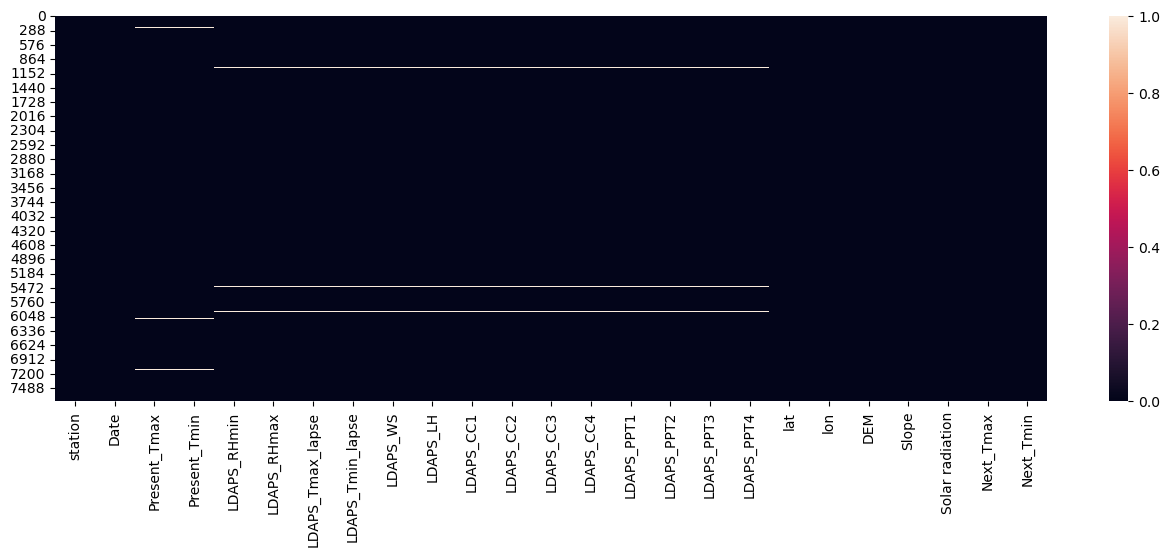

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,5))
sns.heatmap(df.isnull()) #Looking for null values if any, in heatmap

In [14]:
# Examining the station column's unique values.
df['station'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., nan])

We can see that there are 25 stations where temperature readings are taken daily and kept in this location. After 25 stations, Nan is also present.Assume Nan, who is present in the last, contains data for the following day.

In [15]:
# Filling the "station" column with null values.
df['station'].iloc[7750]=1.0
df['station'].iloc[7751]=2.0

In [16]:
#The latest Date column has null values; we'll treat them as predictions for the following day and replace them with the latest Date.
# Now fill in the empty values.
df['Date'].iloc[7750]='31-08-2017'
df['Date'].iloc[7751]='31-08-2017'

In [17]:
# Let's use the imputation method to assign values to the dataset's null values.
# Let's examine the skewness first; if so, we should think about replacing the numbers with the median.
df.skew()

station             0.000182
Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
LDAPS_WS            1.571581
LDAPS_LH            0.670491
LDAPS_CC1           0.457231
LDAPS_CC2           0.470060
LDAPS_CC3           0.637630
LDAPS_CC4           0.663251
LDAPS_PPT1          5.367675
LDAPS_PPT2          5.747360
LDAPS_PPT3          6.425829
LDAPS_PPT4          6.792379
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
dtype: float64

Skewness has a maximum range of +/- 0.50.
LDAPS_Rhmax, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, DEM, Slope, and Solar radiation all exhibit skewness in this instance. We will use median instead of null values for these columns. If there is no skewness in any other columns, the mean will be used to replace any null values.

In [18]:
# In order to replace null values in columns without skewness with mean values,determining what those mean values are.
print("Mean of Present_Tmax = ", df["Present_Tmax"].mean())
print("Mean of Present_Tmin = ", df["Present_Tmin"].mean())
print("Mean of LDAPS_RHmin = ", df["LDAPS_RHmin"].mean())
print("Mean of LDAPS_Tmax_lapse = ", df["LDAPS_Tmax_lapse"].mean())
print("Mean of LDAPS_CC1 = ", df["LDAPS_CC1"].mean())
print("Mean of LDAPS_CC2 = ", df["LDAPS_CC2"].mean())
print("Mean of Next_Tmax = ", df["Next_Tmax"].mean())
print("Mean of Next_Tmin = ", df["Next_Tmin"].mean())

Mean of Present_Tmax =  29.76821140328037
Mean of Present_Tmin =  23.22505857849521
Mean of LDAPS_RHmin =  56.75937215069287
Mean of LDAPS_Tmax_lapse =  29.613446542813577
Mean of LDAPS_CC1 =  0.36877358559828194
Mean of LDAPS_CC2 =  0.35608043728396527
Mean of Next_Tmax =  30.274886731391593
Mean of Next_Tmin =  22.93222006472492


In [19]:
# Let's now substitute these mean values for the nan values.
mean_col=["Present_Tmax","Present_Tmin","LDAPS_RHmin","LDAPS_Tmax_lapse","LDAPS_CC1","LDAPS_CC2","Next_Tmax","Next_Tmin"]
for i in mean_col:
  df[i]=df[i].replace(np.nan,df[i].mean())

Here, we have successfully substituted the column's mean for any nan values.

In [20]:
# Let's now substitute median for NaN values in columns with outliers.
print("Median of LDAPS_RHmax = ",df["LDAPS_RHmax"].median())
print("Median of LDAPS_Tmin_lapse = ", df["LDAPS_Tmin_lapse"].median())
print("Median of LDAPS_WS = ",df["LDAPS_WS"].median())
print("Median of LDAPS_LH = ",df["LDAPS_LH"].median())
print("Median of LDAPS_CC3 = ",df["LDAPS_CC3"].median())
print("Median of LDAPS_CC4 = ",df["LDAPS_CC4"].median())
print("Median of LDAPS_PPT1 = ",df["LDAPS_PPT1"].median())
print("Median of LDAPS_PPT2 = ",df["LDAPS_PPT2"].median())
print("Median of LDAPS_PPT3 = ",df["LDAPS_PPT3"].median())
print("Median of LDAPS_PPT4 = ",df["LDAPS_PPT4"].median())

Median of LDAPS_RHmax =  89.79347992
Median of LDAPS_Tmin_lapse =  23.76019884
Median of LDAPS_WS =  6.547470301
Median of LDAPS_LH =  56.86548154
Median of LDAPS_CC3 =  0.262554604
Median of LDAPS_CC4 =  0.227664469
Median of LDAPS_PPT1 =  0.0
Median of LDAPS_PPT2 =  0.0
Median of LDAPS_PPT3 =  0.0
Median of LDAPS_PPT4 =  0.0


Here, we can notice the skewness in the median values of the aforementioned columns. Using these median values to replace the null values in these columns.

In [21]:
#replacing empty values with the column's median values
med_col=["LDAPS_RHmax","LDAPS_Tmin_lapse","LDAPS_WS","LDAPS_LH","LDAPS_CC3","LDAPS_CC4","LDAPS_PPT1","LDAPS_PPT2","LDAPS_PPT3","LDAPS_PPT4"]
for i in med_col:
  df[i]=df[i].replace(np.nan,df[i].median())

Here, median values have successfully taken the role of nan values.
The null values were successfully removed from our dataset before analysis.

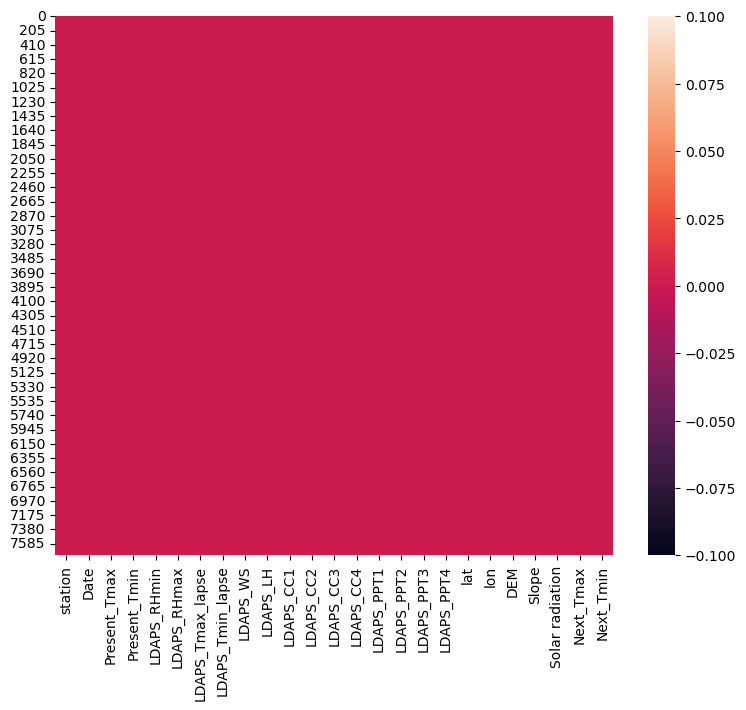

In [23]:
# Displaying the null values once more.
plt.figure(figsize=(9,7))
sns.heatmap(df.isnull())
plt.show()

Now, we can observe that the dataset has no null values.

In [24]:
# Examining the datatype for each column.
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

Here, we can see that every column in the dataset is a float datatype, with the exception of the date column, which is an object datatype.

In [25]:
# Examining the dataset's statistical description.
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7752.000000   7752.000000   7752.000000  7752.000000  7752.000000   
mean     12.997033     29.768211     23.225059    56.759372    88.388529   
std       7.213007      2.956557      2.403036    14.596973     7.158471   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    46.046162    84.316923   
50%      13.000000     29.900000     23.400000    55.313244    89.793480   
75%      19.000000     32.000000     24.900000    67.038254    93.704500   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7752.000000       7752.000000  7752.000000  7752.000000   
mean          29.613447         23.514984     7.092549    62.450457   
std            2.932898          2.334099     2.173913    33.571540   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.693091         22.114651     5.686487    37.532764   
50%           29.662273         23.760199     6.547470    56.865482   
75%           31.683819         25.134000     8.007471    83.904586   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7752.000000  ...  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.368774  ...     0.480310     0.275508     0.266801    37.544722   
std       0.261185  ...     1.754900     1.156495     1.200654     0.050352   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.148321  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.320110  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.571696  ...     0.016748     0.007231     0.000000    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

               lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7752.000000  7752.000000  7752.000000      7752.000000  7752.000000   
mean    126.991397    61.867972     1.257048      5341.502803    30.274887   
std       0.079435    54.279780     1.370444       429.158867     3.122557   
min     126.826000    12.370000     0.098475      4329.520508    17.400000   
25%     126.937000    28.700000     0.271300      4999.018555    28.200000   
50%     126.995000    45.716000     0.618000      5436.345215    30.500000   
75%     127.042000    59.832400     1.767800      5728.316406    32.600000   
max     127.135000   212.335000     5.178230      5992.895996    38.900000   

         Next_Tmin  
count  7752.000000  
mean     22.932220  
std       2.483276  
min      11.300000  
25%      21.400000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

Almost all of the columns have a difference between the maximum and 75% percentile, which indicates the presence of outliers.

The 50% percentile is different from the mean value, indicating skewness.

In [26]:
#Examining each column's value counts.
for i in df.columns:
    print(df[i].value_counts())
    print('--------------------------------------------------')

1.0     311
2.0     311
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
13.0    310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: station, dtype: int64
--------------------------------------------------
30-06-2013    25
19-07-2016    25
26-07-2016    25
25-07-2016    25
24-07-2016    25
              ..
10-08-2014    25
09-08-2014    25
08-08-2014    25
07-08-2014    25
31-08-2017     2
Name: Date, Length: 311, dtype: int64
--------------------------------------------------
31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: Present_Tmax, Length: 168, dtype: int64
--------------------------------------------------
24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.6      1
14.2      1
29.1      1
29.7    

The dataset's value counts for each column are shown here.

# Preprocessing and Exploratory Data Analysis (EDA)

In [6]:
#Examining the dataset's shape.
df.shape

(7752, 25)

Here, we can see that the dataset's 7752 rows are divided into 25 columns.

In [7]:
# Reviewing the details about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


As we can see, the data contains 1 object and all other number columns.

In this example, we can observe that 18 of the total 25 columns contain null values. If the right imputation value is not entered, these rows will be removed from the dataset.

Even the target columns we are aiming for have null values.

In [59]:
# removing all values for null
df=df.dropna()

In [60]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

All null values were eliminated.

<AxesSubplot:>

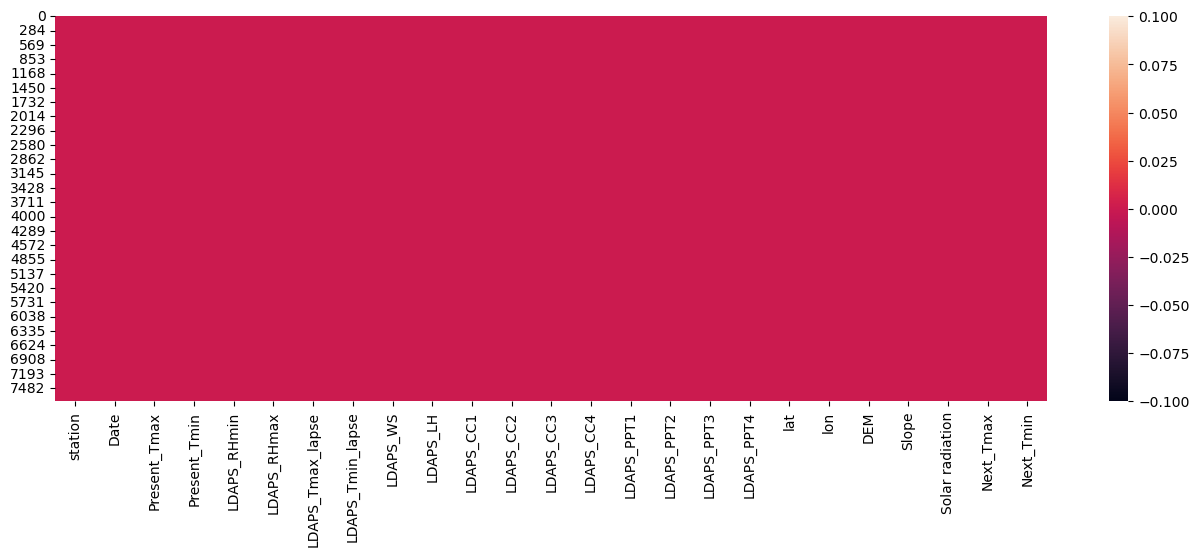

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,5))
sns.heatmap(df.isnull())

No null values exist.

# Visualizing

In [63]:
dfcor=df.corr()

<AxesSubplot:>

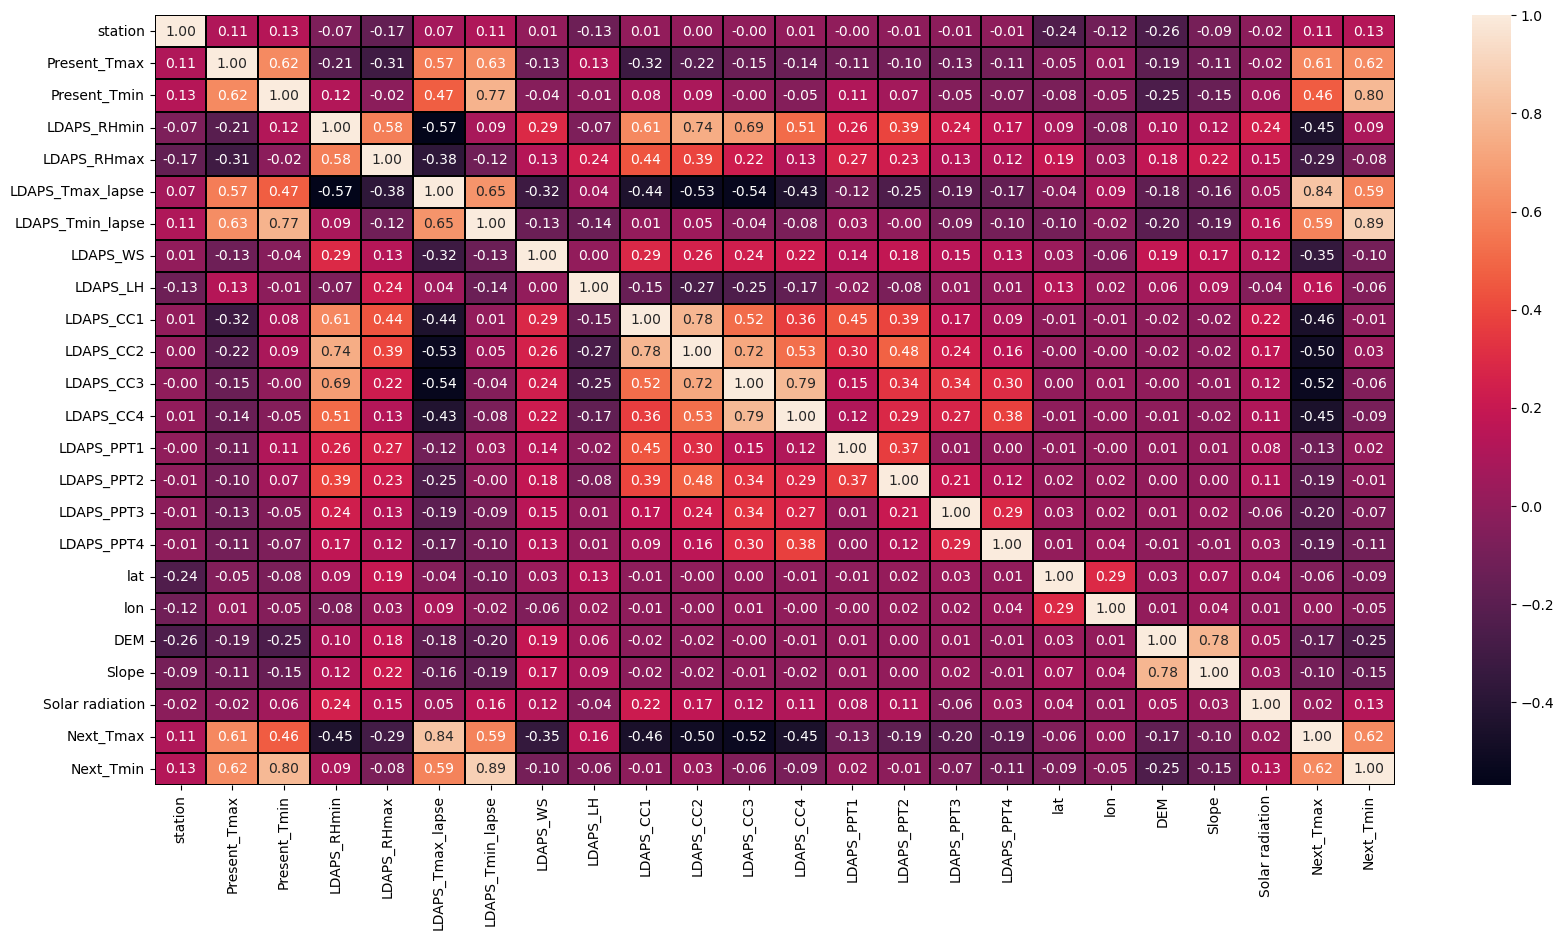

In [64]:
plt.figure(figsize=(20,10))
sns.heatmap(dfcor,annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

As we can see Present_Tmax and Present_Tmin have a strong correlation with the target variables, as do LDAPS_RHmin and LDAPS_RHmax, Next_Tmin and Next_Tmax have a strong correlation with each other, and the majority of the columns have a strong negative correlation with the target variables.

# Univariate Analysis

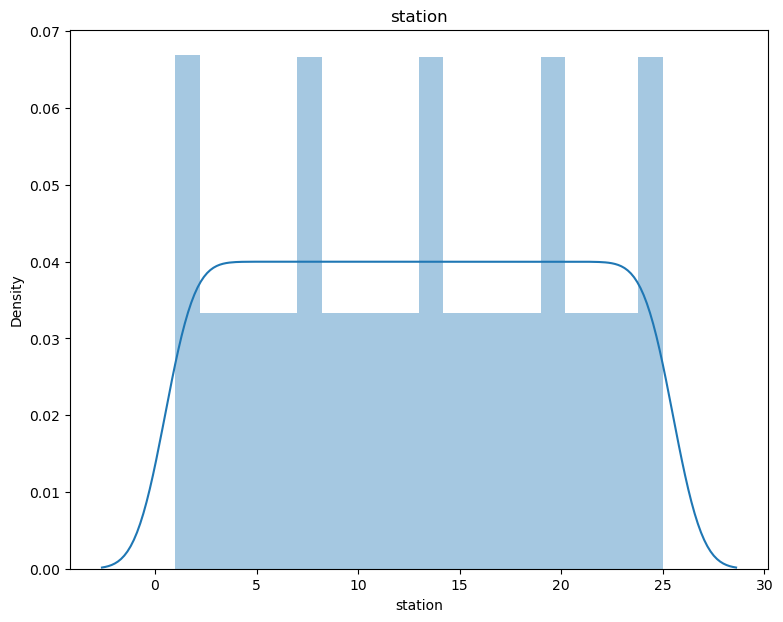

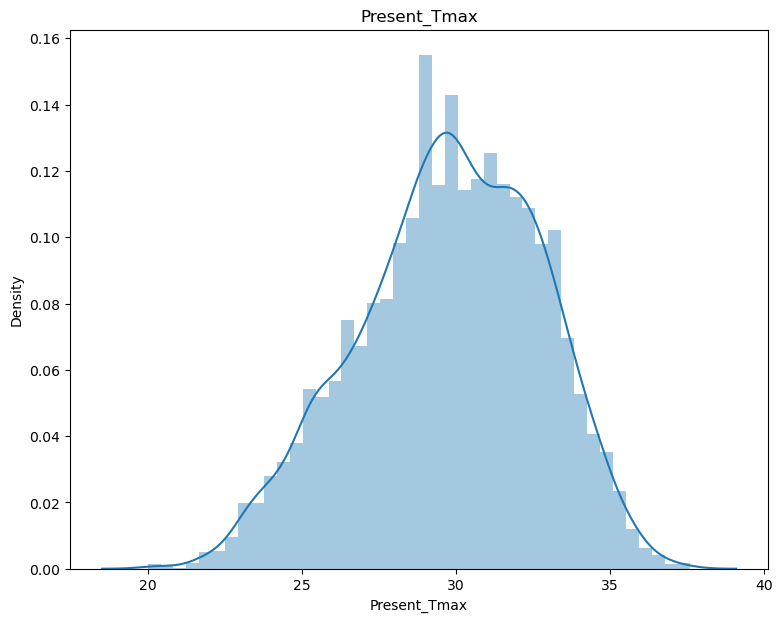

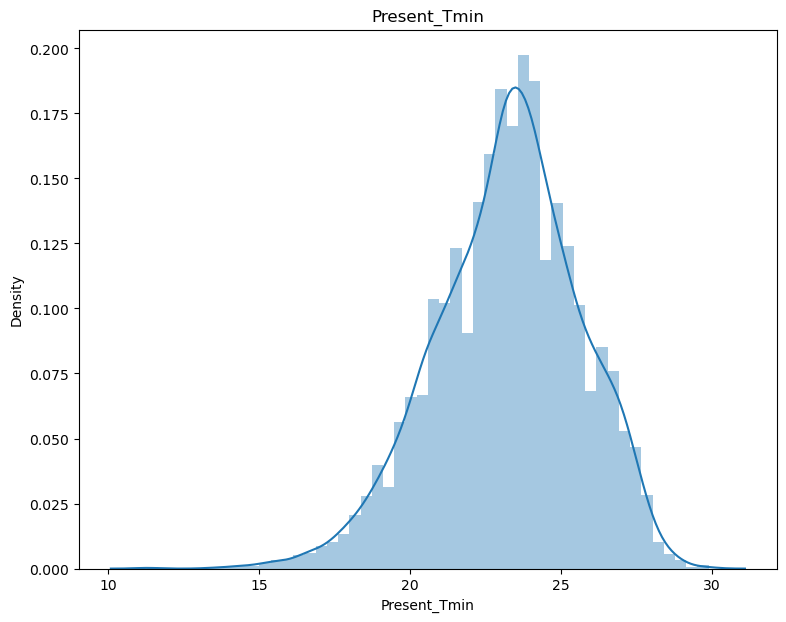

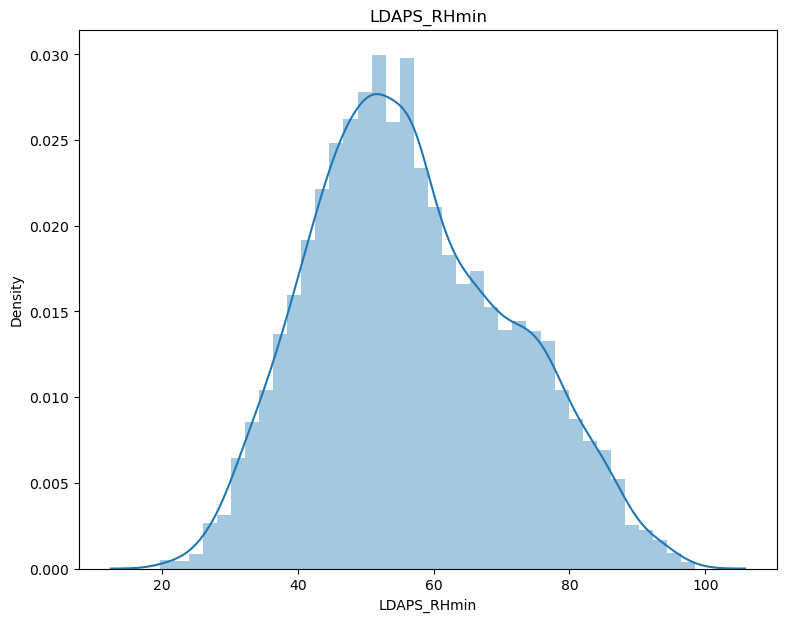

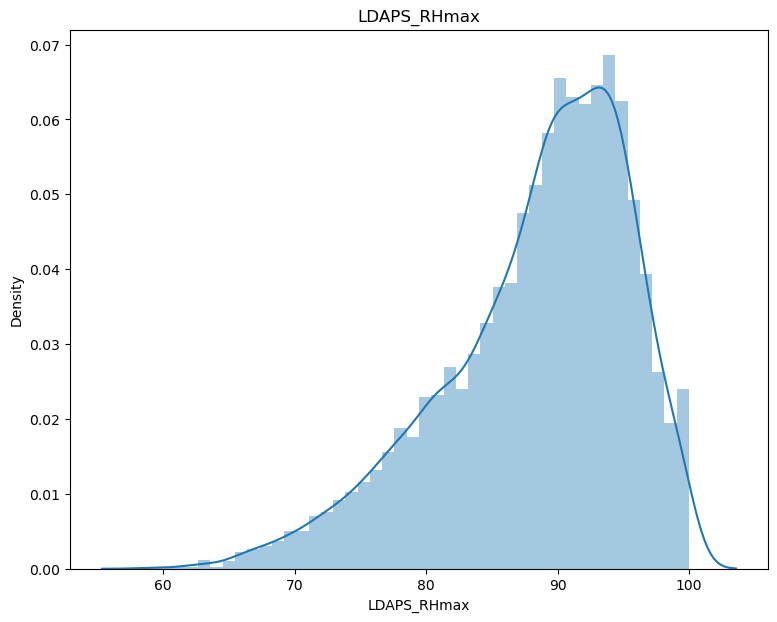

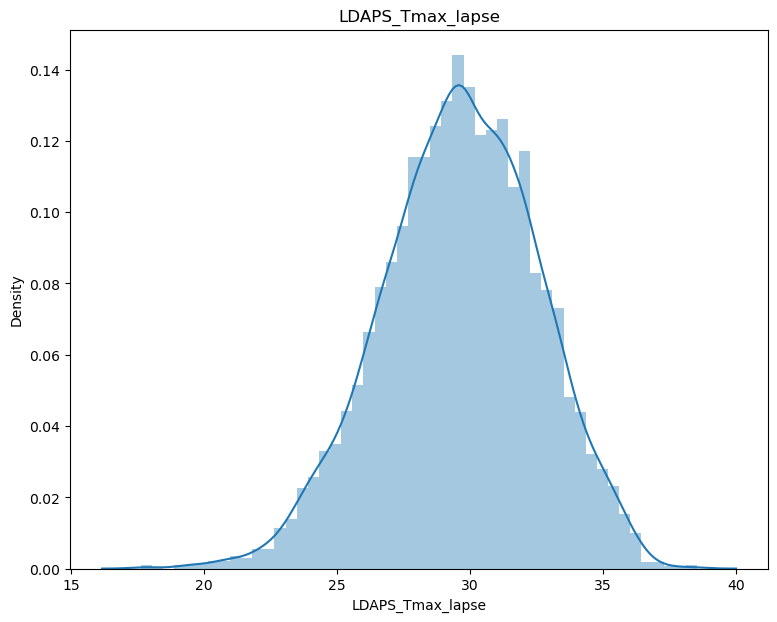

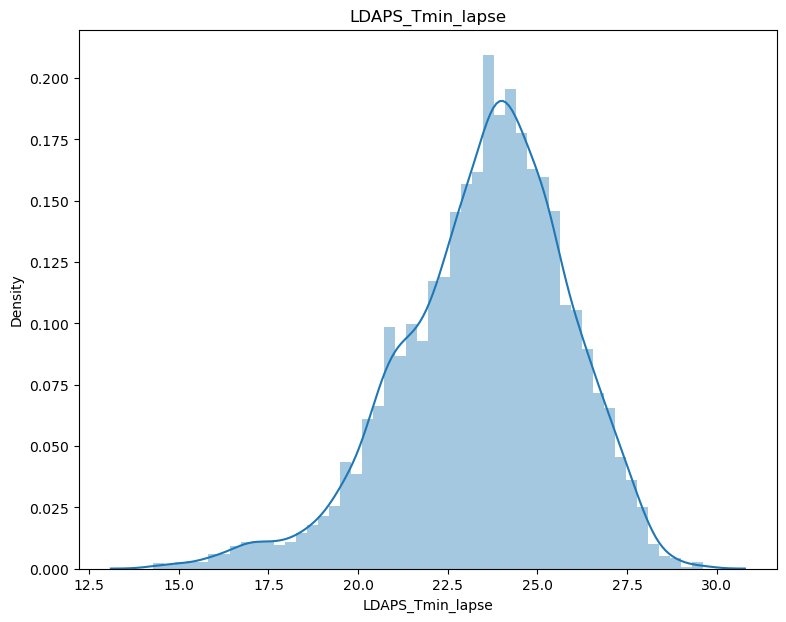

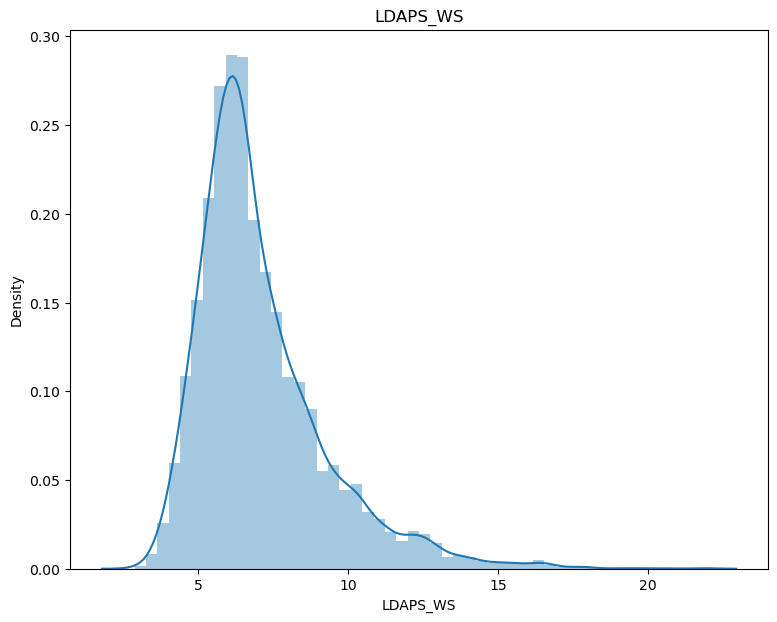

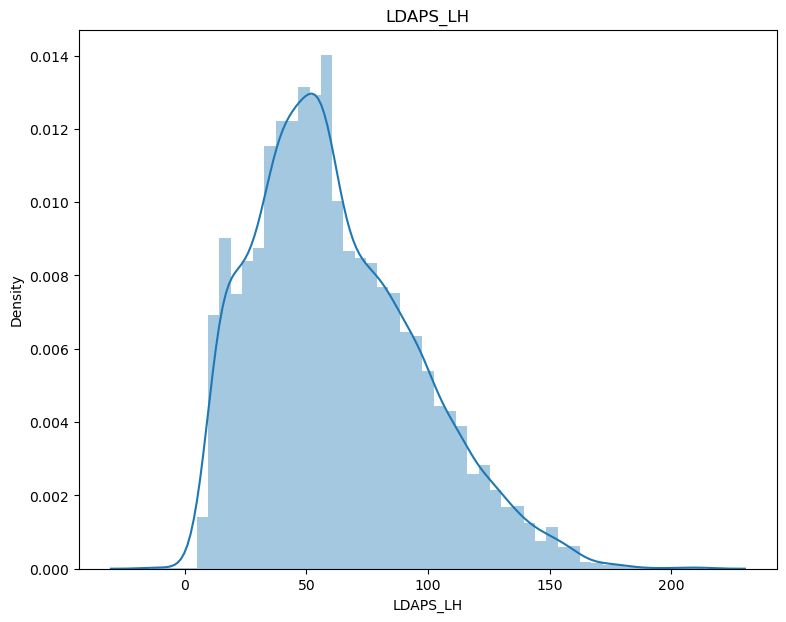

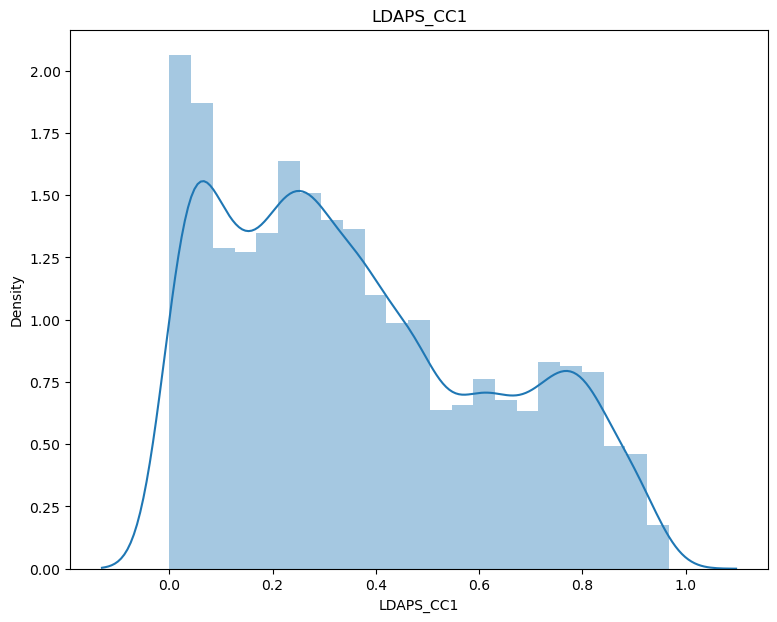

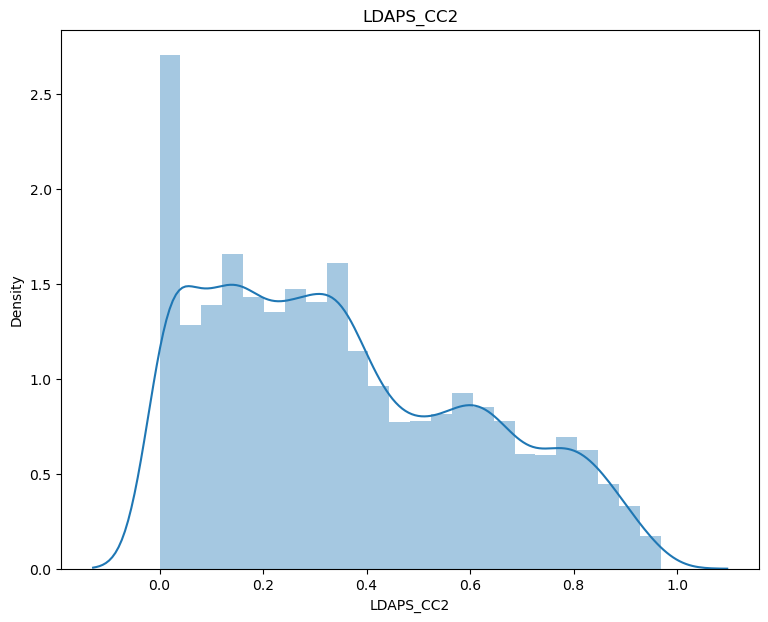

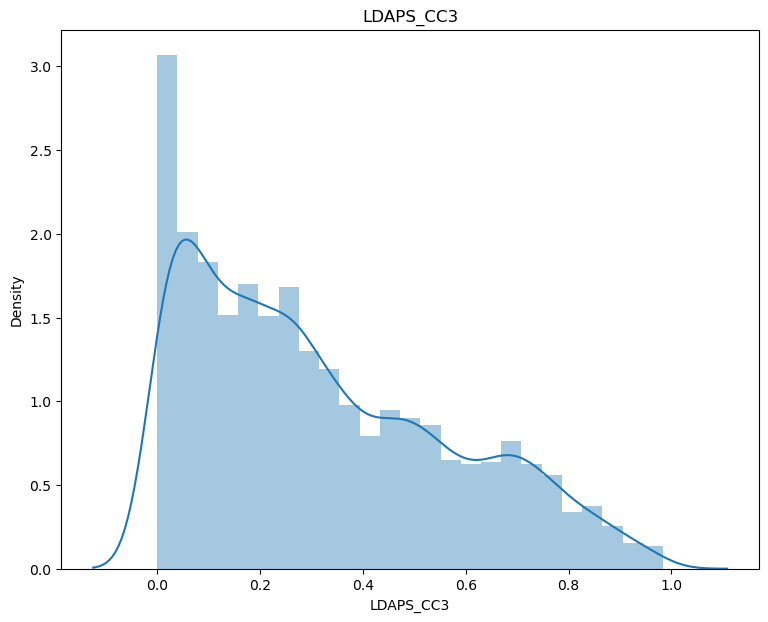

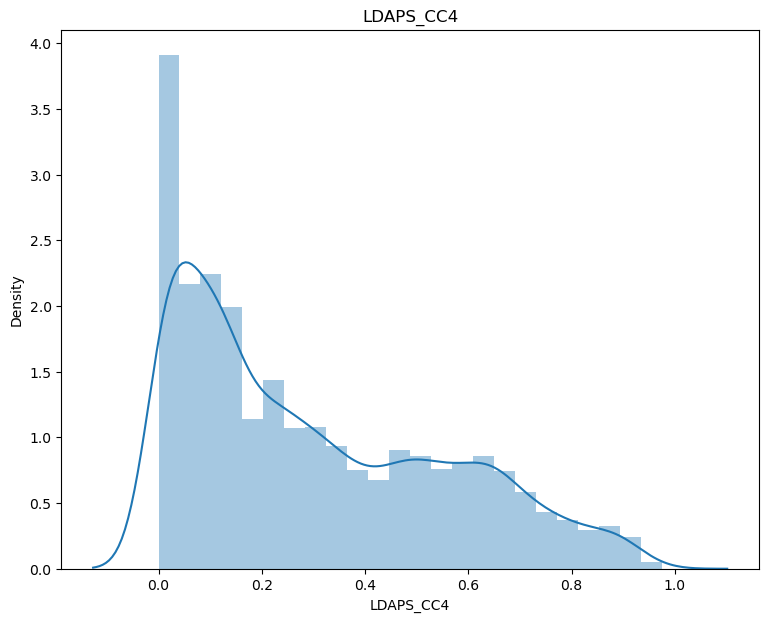

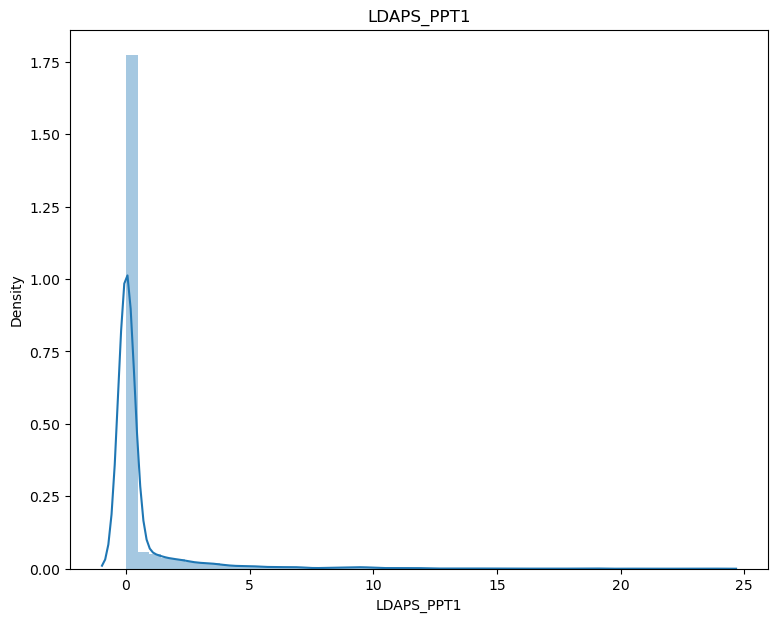

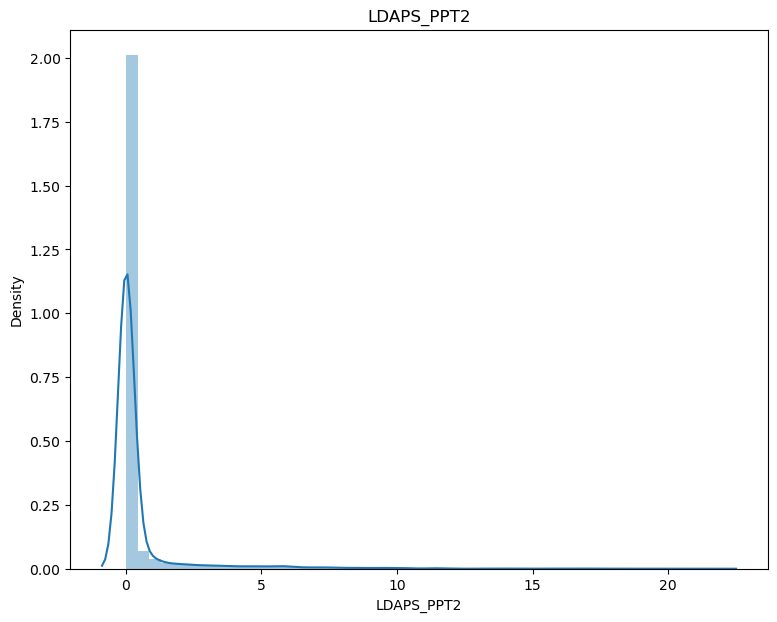

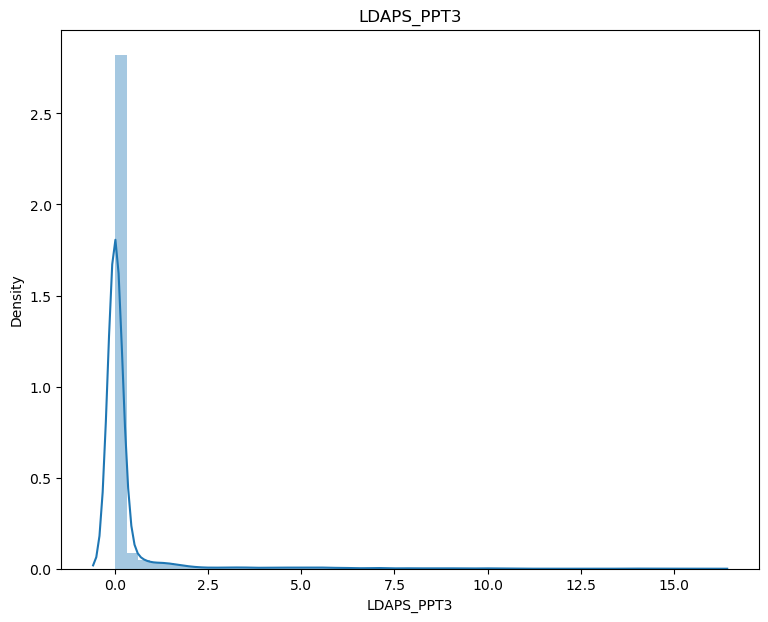

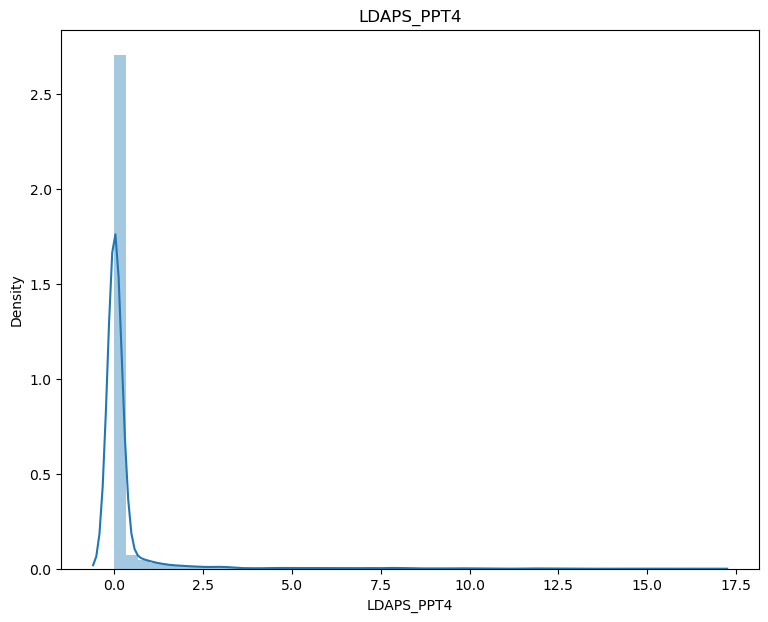

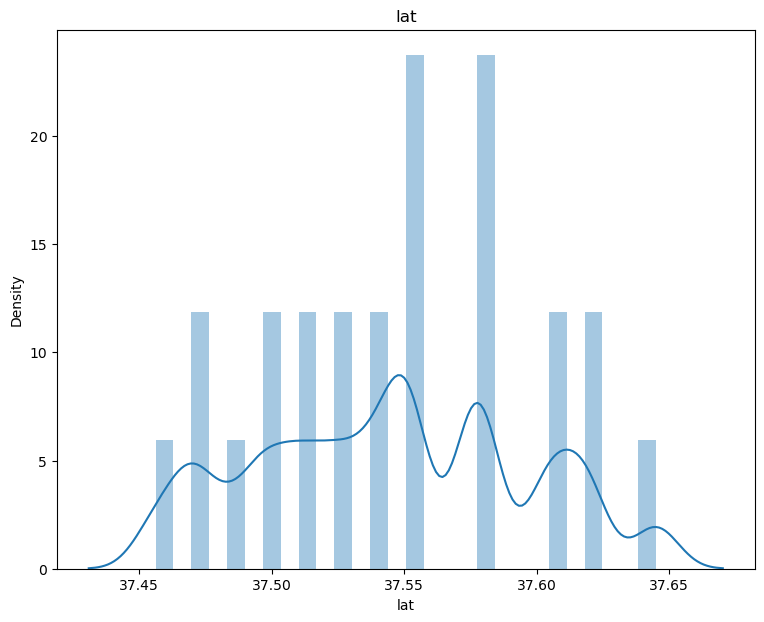

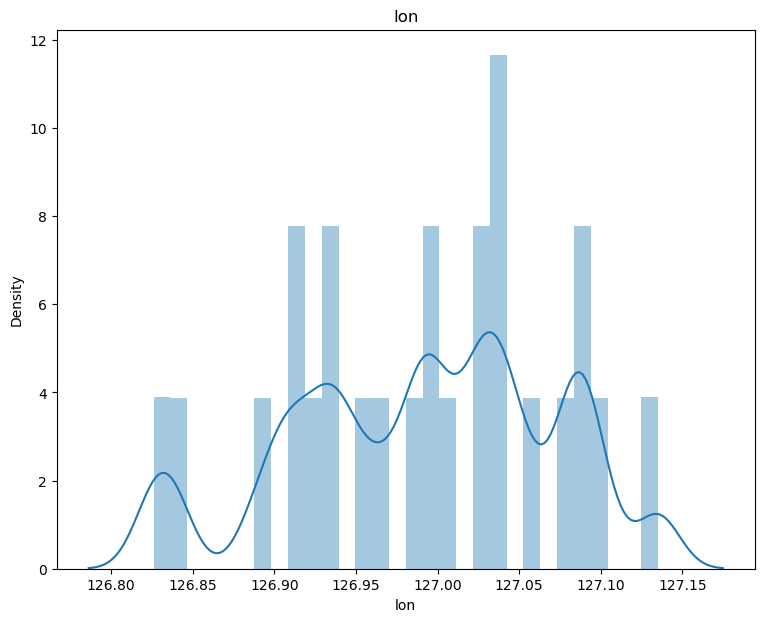

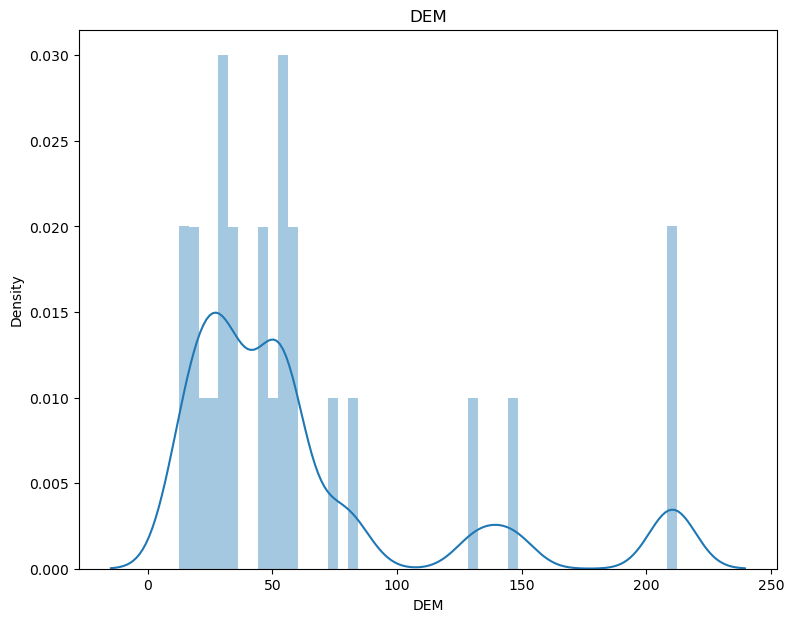

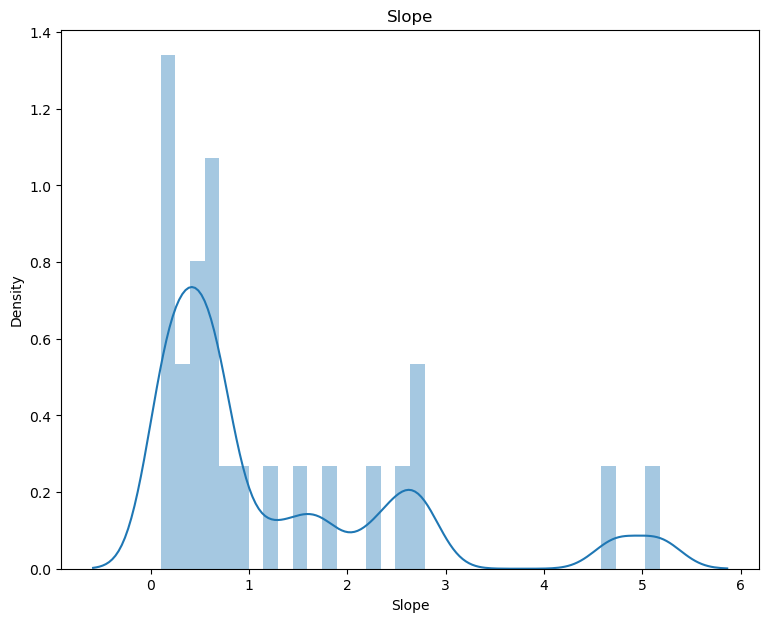

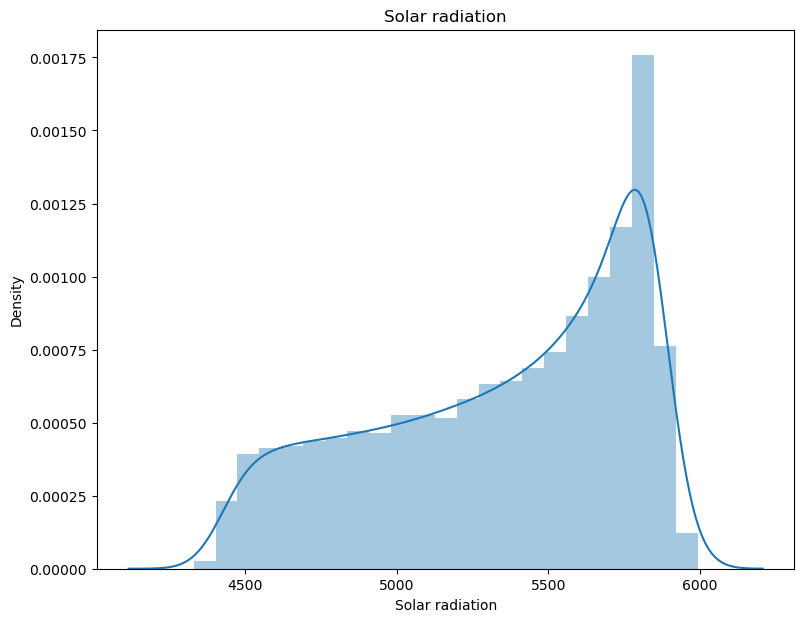

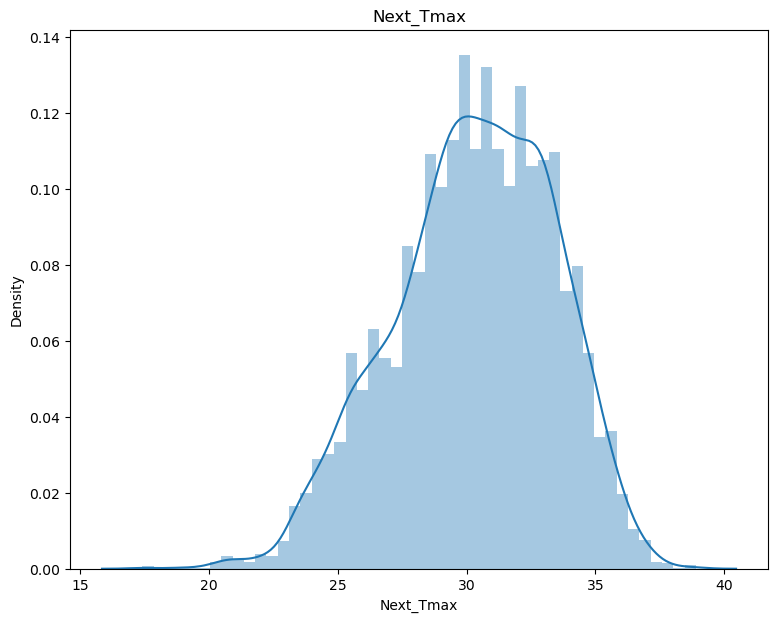

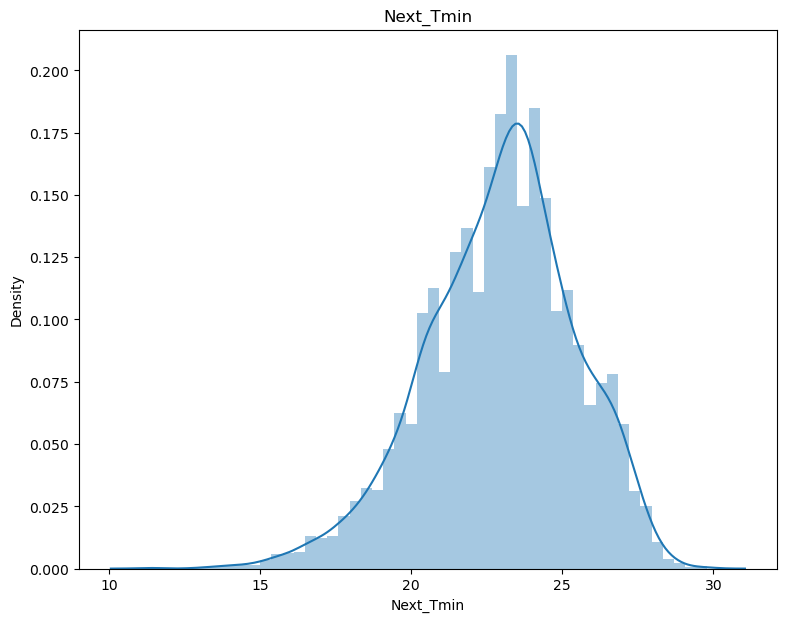

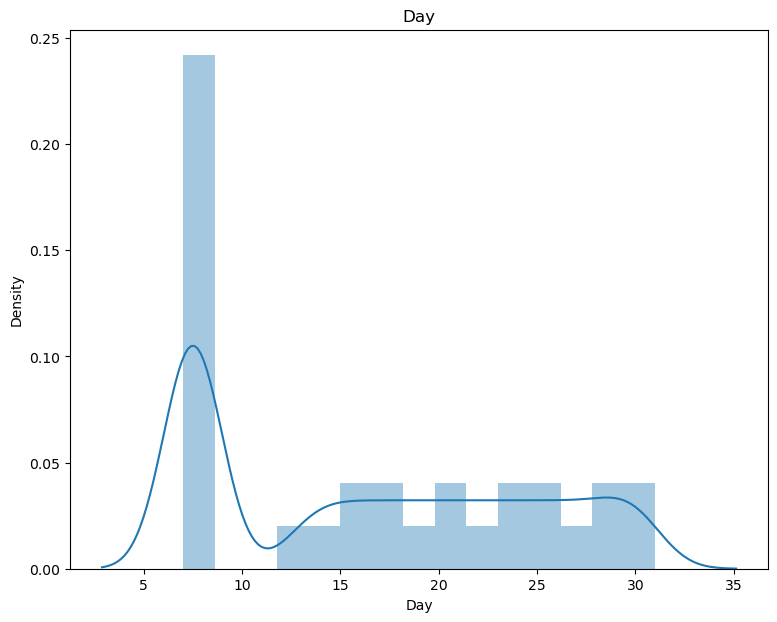

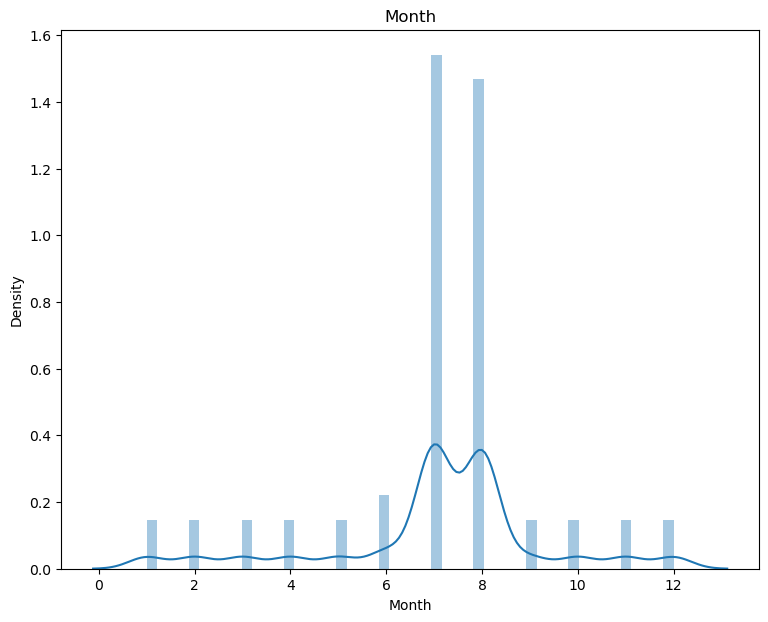

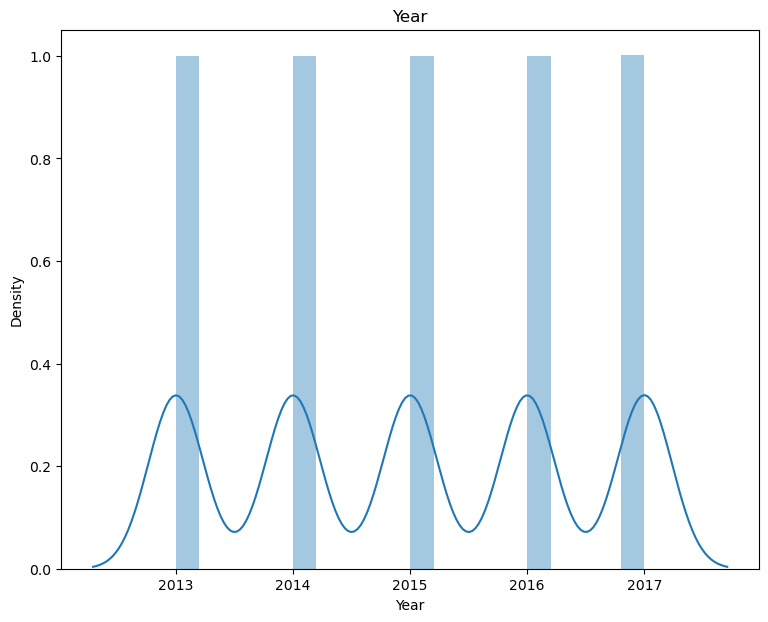

In [35]:
#Using a histogram to visualize all the columns.
for i in df.columns:
    plt.figure(figsize=(9,7))
    sns.distplot(df[i],kde=True)
    plt.title(i)
    plt.show()

Here, we can observe that the data in the Station Column appears to be distributed normally.

Data appears to be regularly distributed with nearly minimal skewness in Present Tmax.

The current Tmin appears to be somewhat skewed to the right, but its shape appears to be bell-shaped.

When LDAPS_RHmin appears somewhat to the left, the mean is greater than the median.

The median is greater than the mean, and LDAPS_RHmax has right-skewed.

Additionally left skewed are LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, and LDAPS_CC4.

All of these presentations—LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, and LDAPS_PPT4—are also tilted to the left.

Although the data in LAT and LON appear to be regularly distributed, their spread out nature indicates that their high standard deviation.

Both DEM and Slope have a leftward tilt.

The rightward skew of solar radiation.

The distribution of our target columns, Next_Tmax and Next_Tmin, appears to be typical distributed normally.

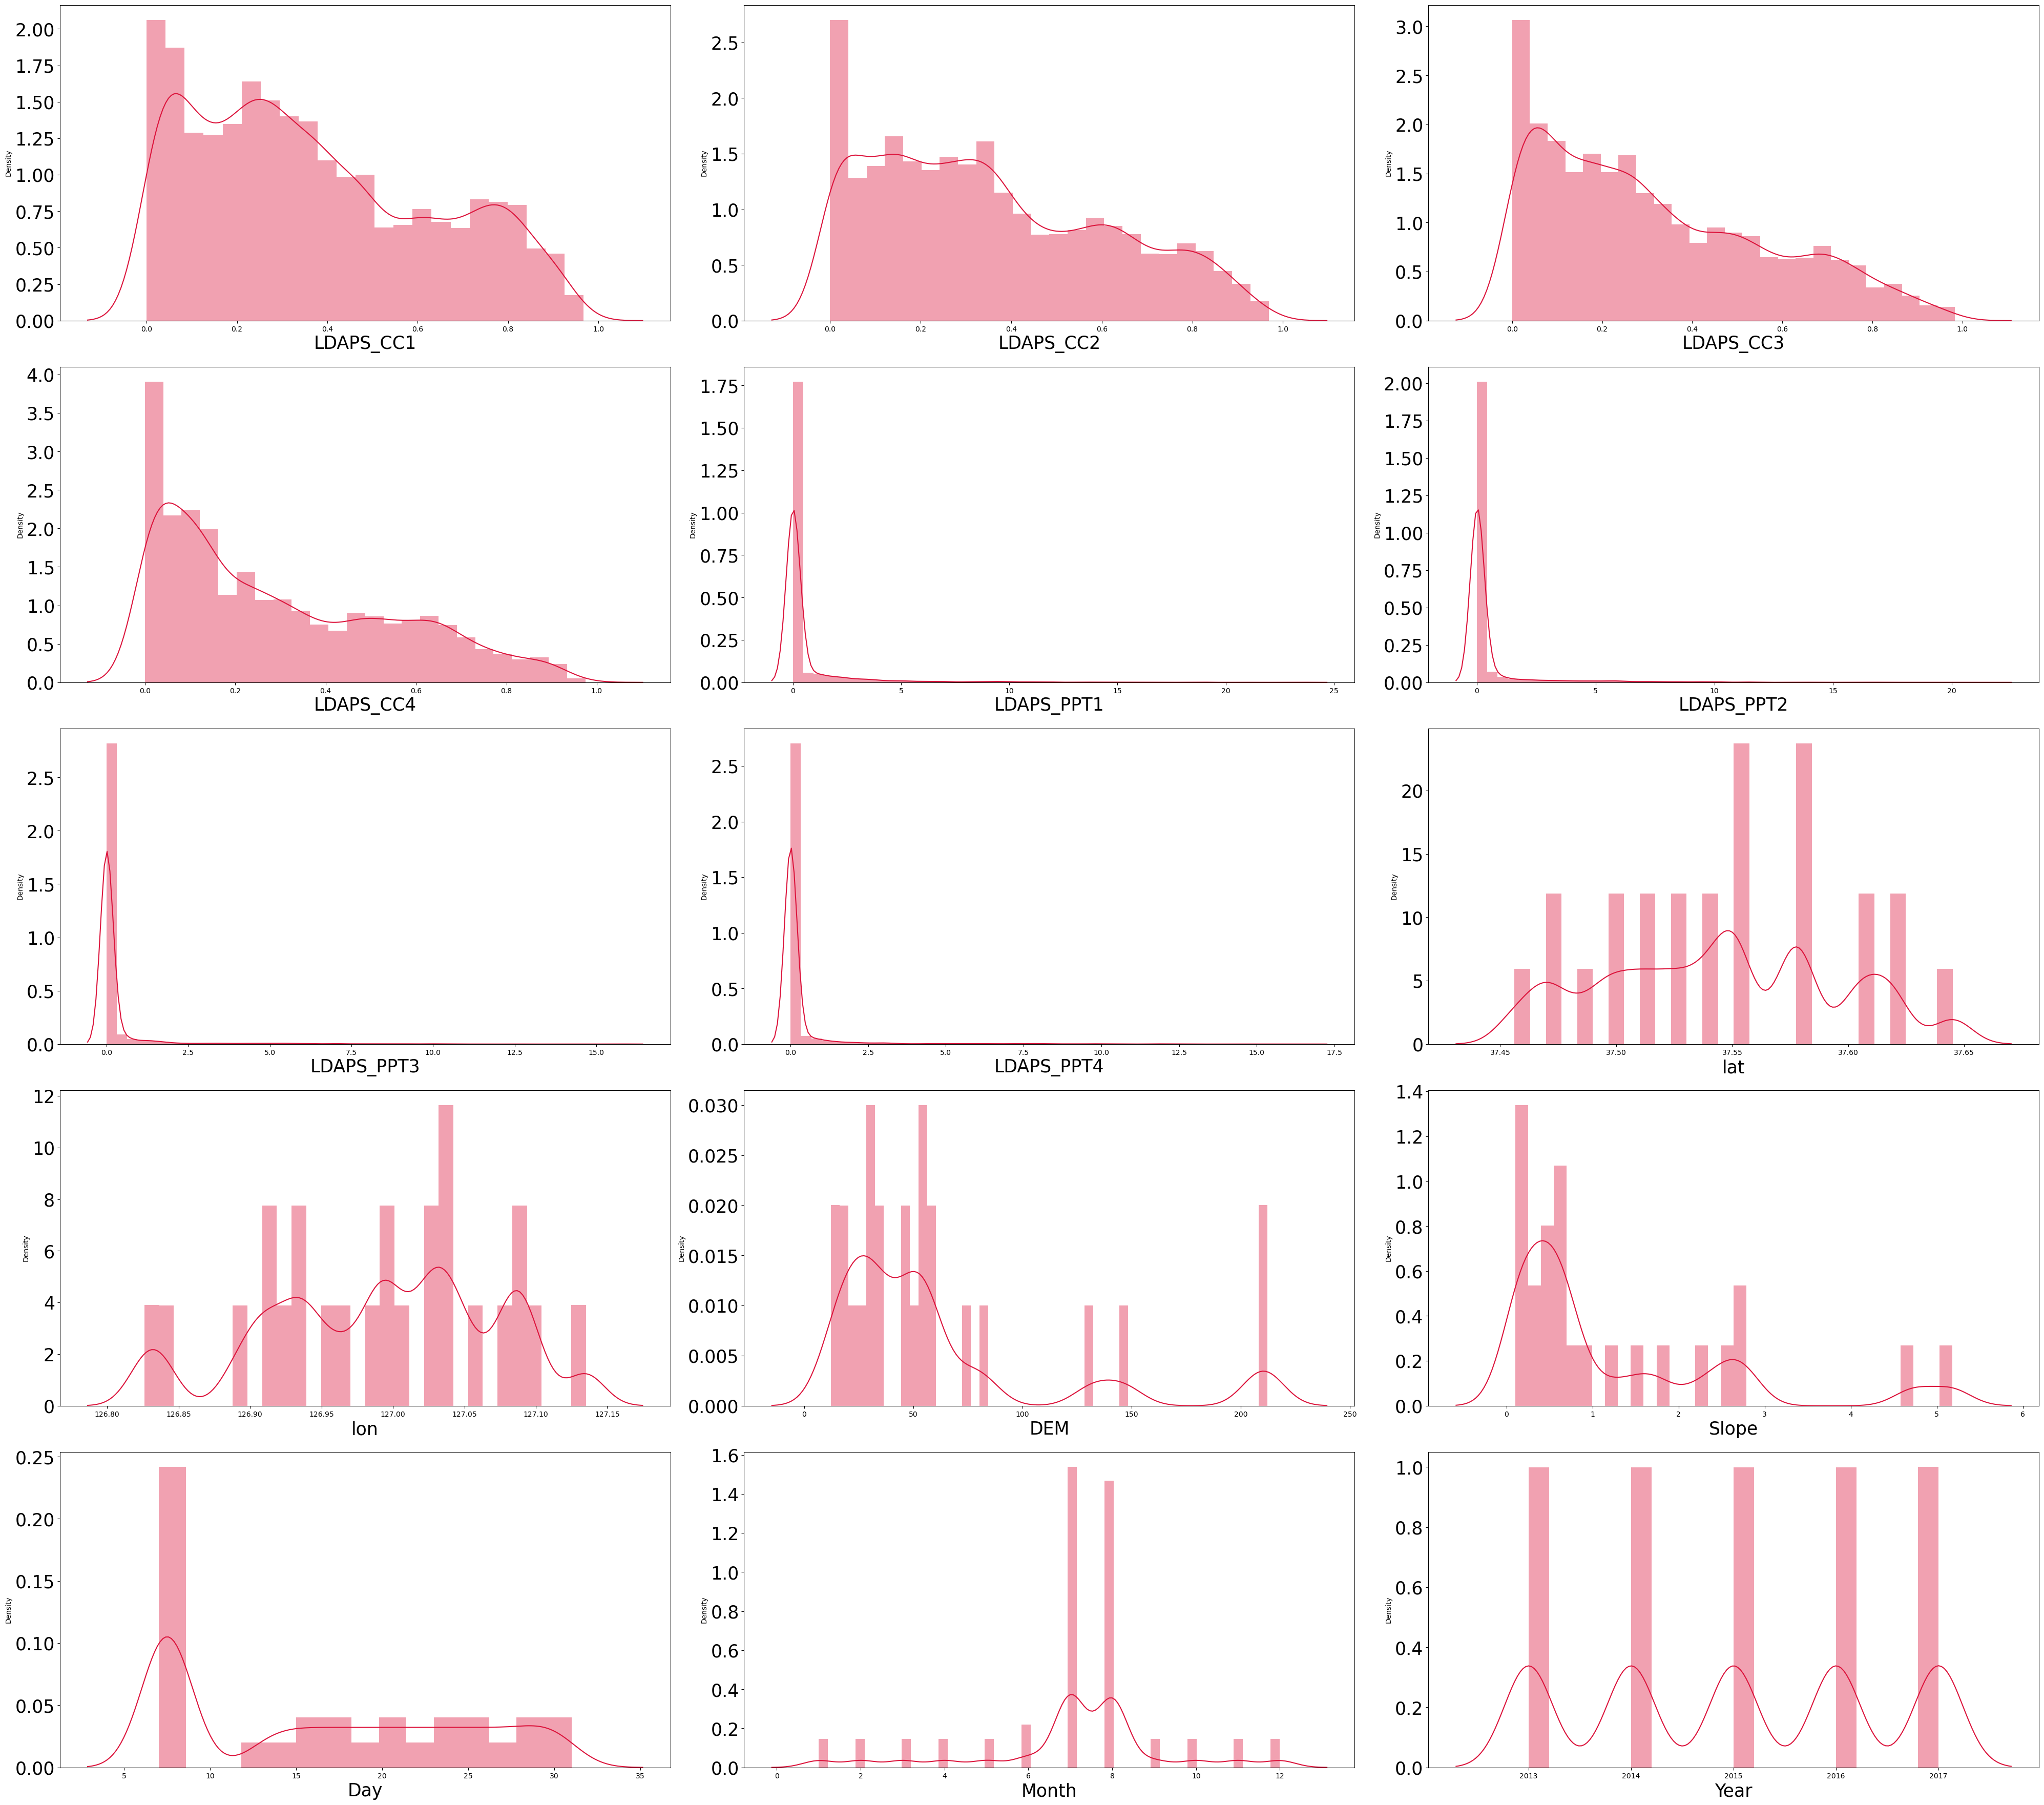

In [36]:
#Using Distplot to examine how the data has been distributed across the remaining columns.
plt.figure(figsize=(40,70),facecolor='white')
plotnumber=1
for column in df.columns.drop(["Next_Tmax","Next_Tmin","Solar radiation"]):
    if plotnumber>=10:
        ax=plt.subplot(10,3,plotnumber)
        sns.distplot(df[column],color="crimson")
        plt.xlabel(column,fontsize=25)
        plt.yticks(rotation=0,fontsize=25)
    plotnumber+=1
plt.tight_layout()

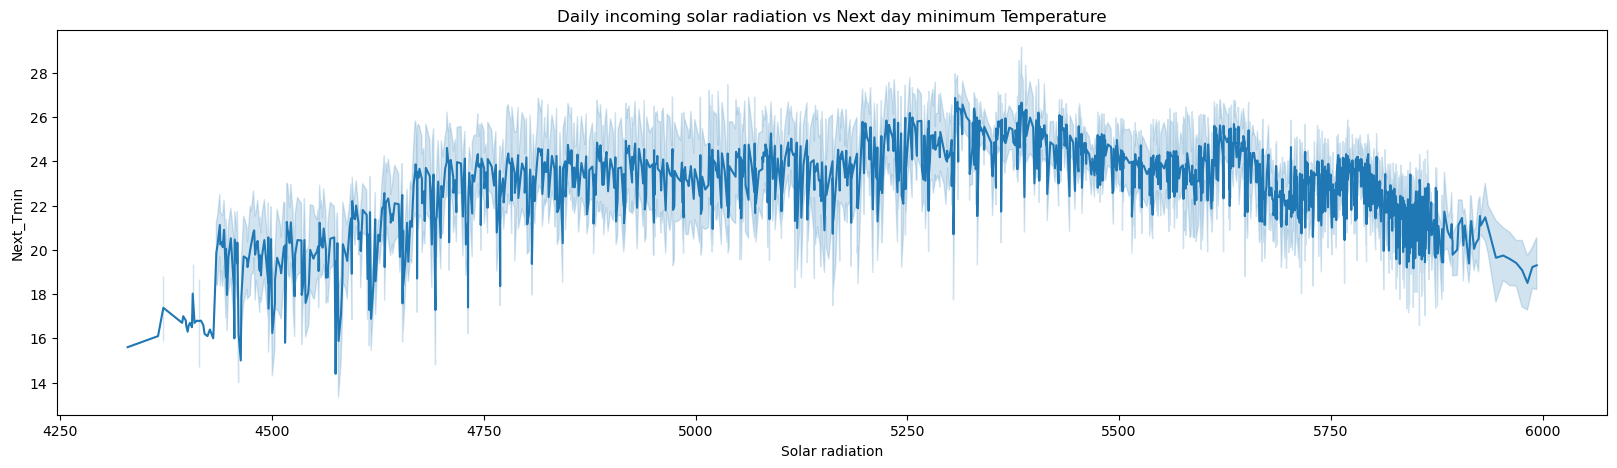

In [66]:
plt.figure(figsize=(20,5))
plt.title('Daily incoming solar radiation vs Next day minimum Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmin',data=df)
plt.show()

Here, we can see that the lowest temperature for the following day is regularly rising.

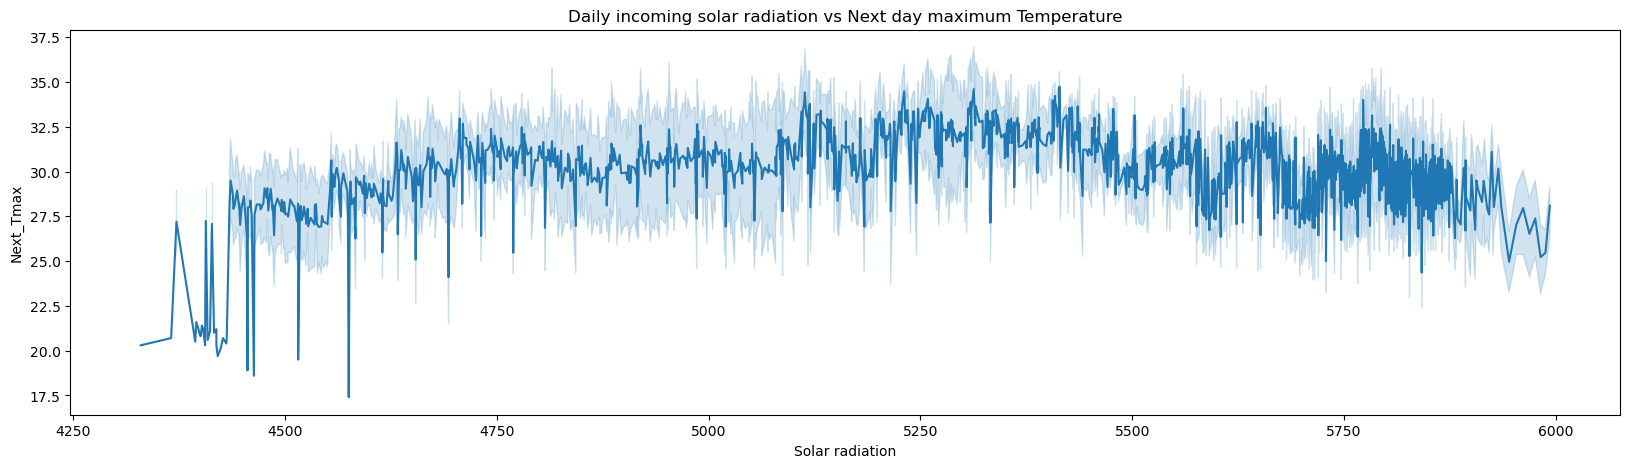

In [16]:
plt.figure(figsize=(20,5))
plt.title('Daily incoming solar radiation vs Next day maximum Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmax',data=df)
plt.show()

Here, we can see that the maximum temperature typically rises the following day.

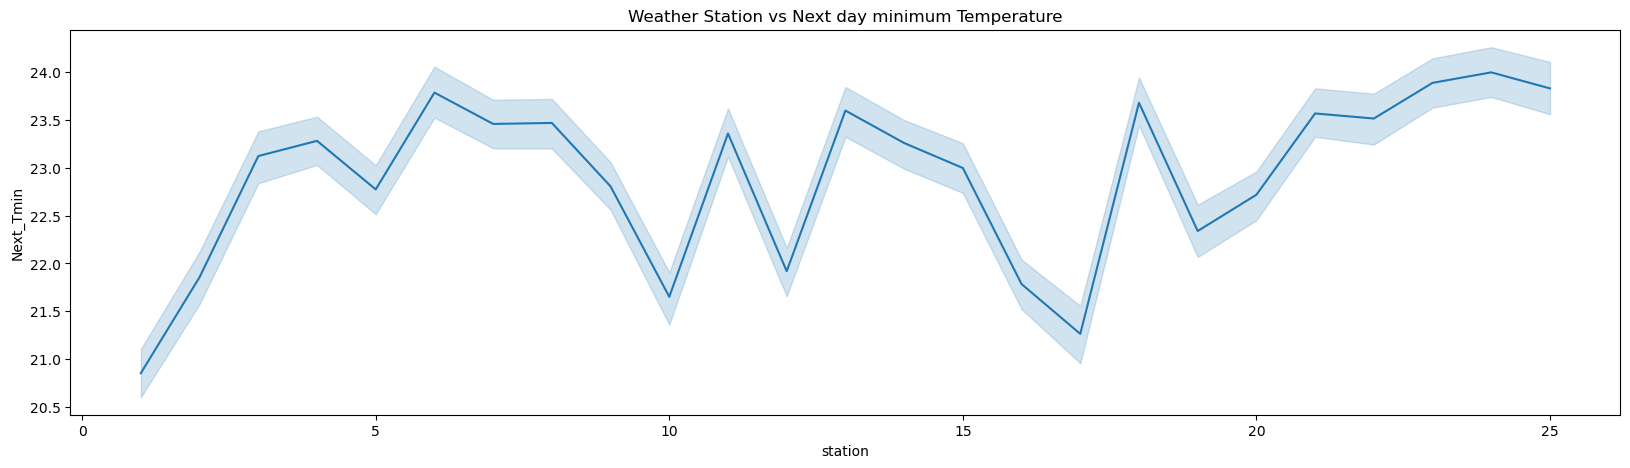

In [17]:
plt.figure(figsize=(20,5))
plt.title('Weather Station vs Next day minimum Temperature')
sns.lineplot(x='station',y='Next_Tmin',data=df)
plt.show()

Here, the line plot clearly shows that the maximum and low minimum temperatures for the following day are located at stations 18 and 17, respectively.

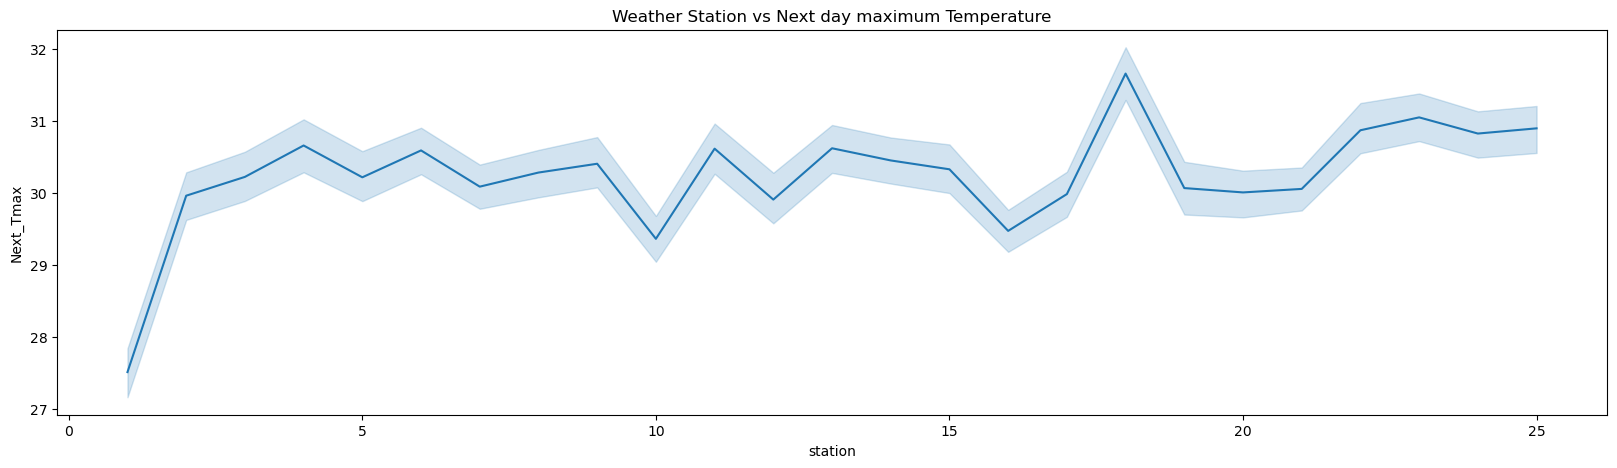

In [18]:
plt.figure(figsize=(20,5))
plt.title('Weather Station vs Next day maximum Temperature')
sns.lineplot(x='station',y='Next_Tmax',data=df)
plt.show()

Here, the line plot clearly shows that the high and low maximum temperatures for the following day are located at stations 18 and 10, respectively.

# Bivariate Analysis

Text(0, 0.5, 'Next_Tmax')

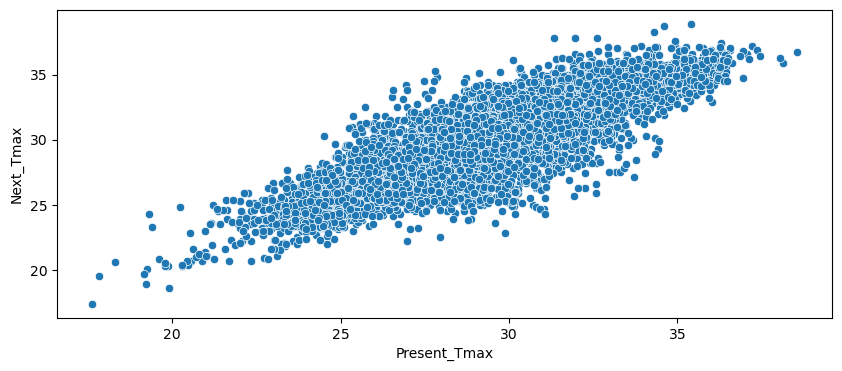

In [19]:
plt.figure(figsize=(10,4))
sns.scatterplot(df['LDAPS_Tmax_lapse'], df['Next_Tmax'])
plt.xlabel('Present_Tmax')
plt.ylabel('Next_Tmax')

As we can see, the temperature is rising together with LDAPS_Tmax_lapse.

Text(0, 0.5, 'Next_Tmin')

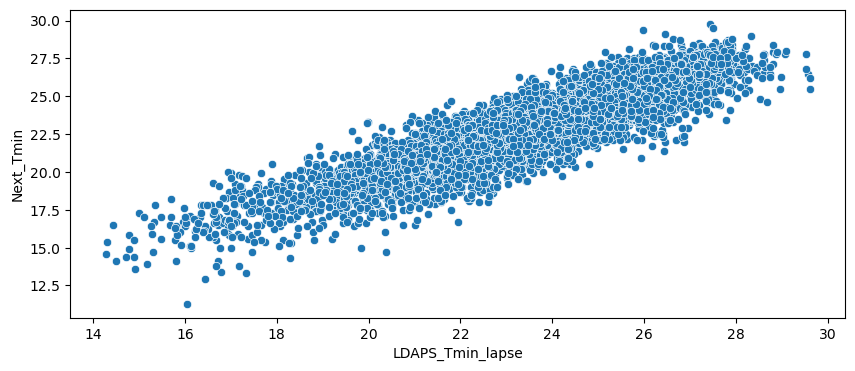

In [20]:
plt.figure(figsize=(10,4))
sns.scatterplot(df['LDAPS_Tmin_lapse'], df['Next_Tmin'])
plt.xlabel('LDAPS_Tmin_lapse')
plt.ylabel('Next_Tmin')

With LDAPS_Tmin_lapse, we can see that the temperature is also declining.

Text(0, 0.5, 'Next_Tmin')

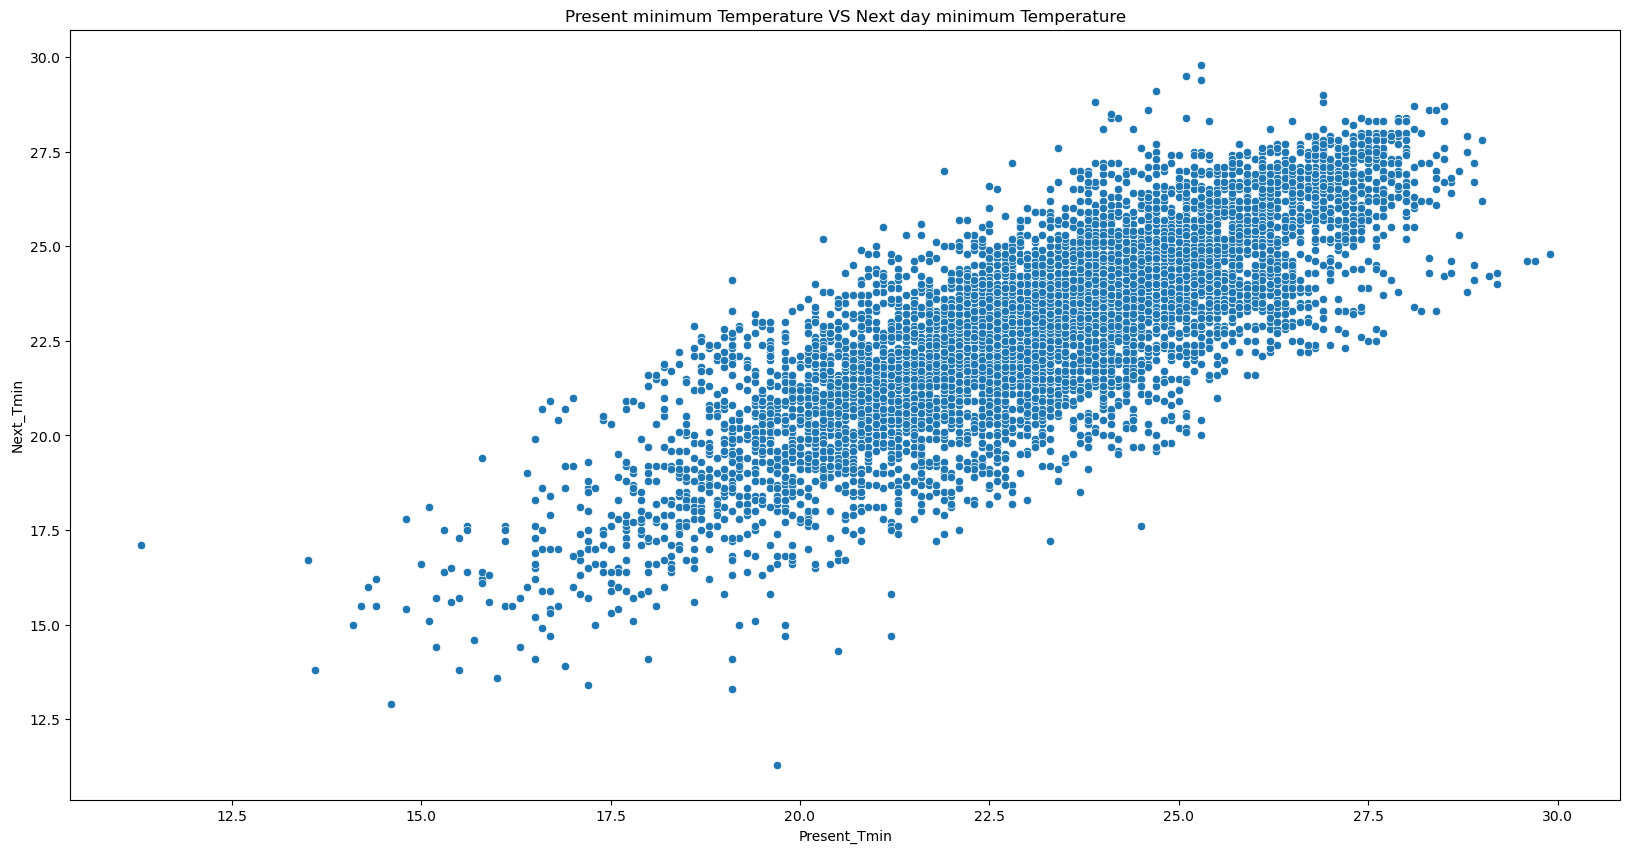

In [21]:
# Distribution of data between Today's minimum temperature and Tomorrow's minimum temperature is shown in a scatterplot.
plt.figure(figsize=(20,10))
plt.title('Present minimum Temperature VS Next day minimum Temperature')
sns.scatterplot(df['Present_Tmin'], df['Next_Tmin'])
plt.xlabel('Present_Tmin')
plt.ylabel('Next_Tmin')

Here, we can see the Present_Tmin temperature. Next_Tmin is also falling in decreasing

Text(0, 0.5, 'Next_Tmax')

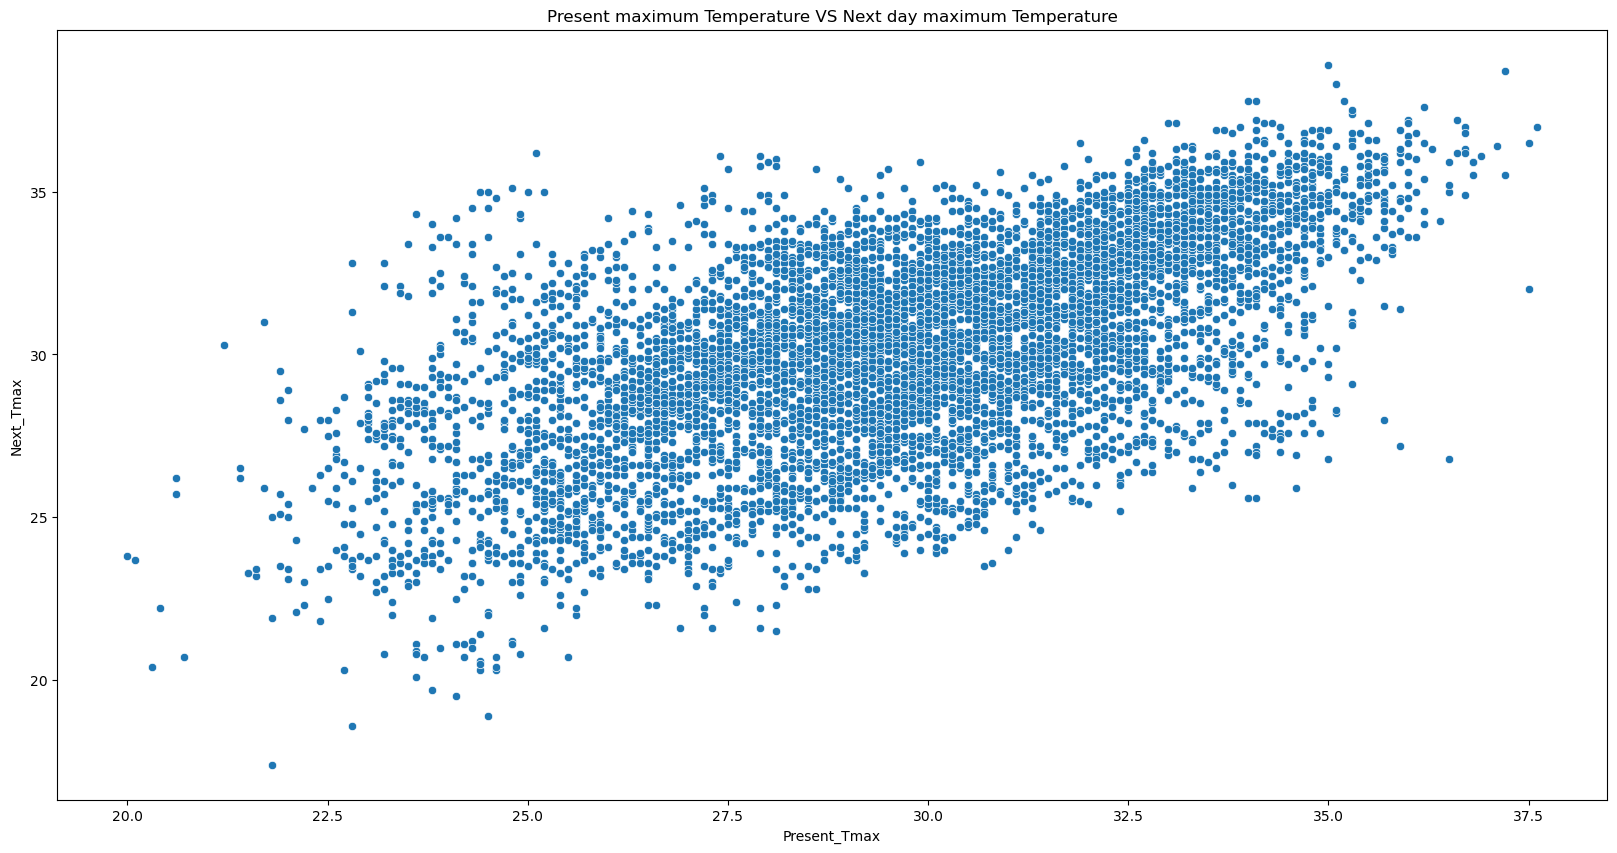

In [22]:
#Distribution of data between Maximum Temperature in the Present vs. Maximum Temperature in the next day is shown in a scatterplot.
plt.figure(figsize=(20,10))
plt.title('Present maximum Temperature VS Next day maximum Temperature')
sns.scatterplot(df['Present_Tmax'], df['Next_Tmax'])
plt.xlabel('Present_Tmax')
plt.ylabel('Next_Tmax')

Here, we can observe that while Present_Tmax rises, Next_Tmax similarly rises.

<AxesSubplot:title={'center':'Next day maximum Temperature'}, xlabel='Next_Tmax', ylabel='Density'>

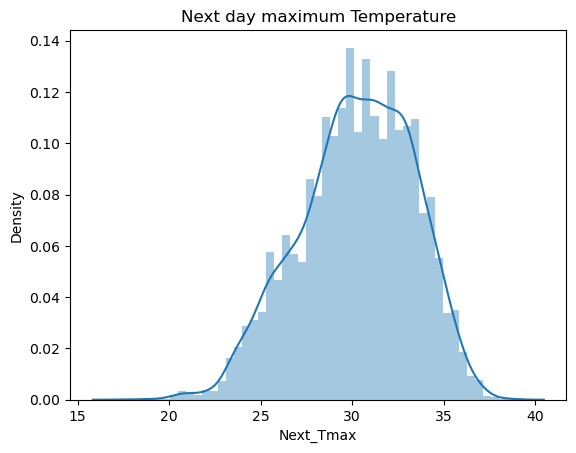

In [23]:
plt.title('Next day maximum Temperature')
sns.distplot(df['Next_Tmax'],kde=True)

The distplot clearly shows that the range of the following day's maximum temperature is 22 to 37.

<AxesSubplot:title={'center':'Next day minimum Temperature'}, xlabel='Next_Tmin', ylabel='Density'>

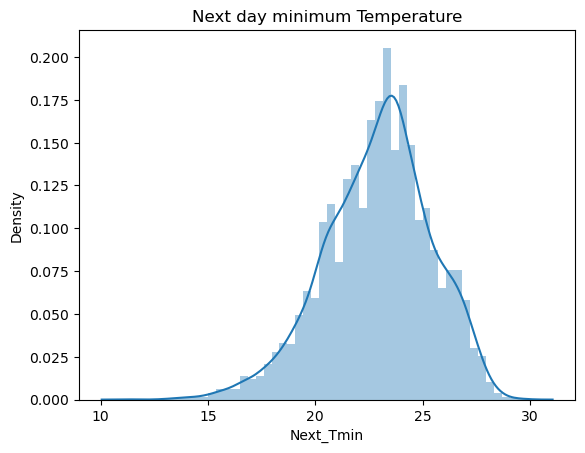

In [24]:
plt.title('Next day minimum Temperature')
sns.distplot(df['Next_Tmin'],kde=True)

The distribution figure clearly shows that the range of the next day's minimum temperature is between 15 and 28.

# Feature Engineering:

In [30]:
# Using df.head() to examine the dataset head.
df.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  6.818887   69.451805   0.233947  ...   
1         29.850689         24.035009  5.691890   51.937448   0.225508  ...   
2         30.091292         24.565633  6.138224   20.573050   0.209344  ...   
3         29.704629         23.326177  5.650050   65.727144   0.216372  ...   
4         29.113934         23.486480  5.735004  107.965535   0.151407  ...   

       lat      lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  \
0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1       21.2   
1  37.6046  127.032   44.7624  0.5141      5869.312500       30.5       22.5   
2  37.5776  127.058   33.3068  0.2661      5863.555664       31.1       23.9   
3  37.6450  127.022   45.7160  2.5348      5856.964844       31.7       24.3   
4  37.5507  127.135   35.0380  0.5055      5859.552246       31.2       22.5   

   Day  Month  Year  
0   30      6  2013  
1   30      6  2013  
2   30      6  2013  
3   30      6  2013  
4   30      6  2013  

[5 rows x 27 columns]

Here, we can see that the Date column has been successfully deleted from the dataset.

In [67]:
import datetime as ddt
df['Date']=pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(ddt.datetime.toordinal)

In [69]:
df.head()

station    Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  735049          28.7          21.4    58.255688    91.116364   
1      2.0  735049          31.9          21.6    52.263397    90.604721   
2      3.0  735049          31.6          23.3    48.690479    83.973587   
3      4.0  735049          32.0          23.4    58.239788    96.483688   
4      5.0  735049          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

# Label Encoder is Utilized

In [70]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=l.fit_transform(df[i].values)

In [71]:
df.head()

station    Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  735049          28.7          21.4    58.255688    91.116364   
1      2.0  735049          31.9          21.6    52.263397    90.604721   
2      3.0  735049          31.6          23.3    48.690479    83.973587   
3      4.0  735049          32.0          23.4    58.239788    96.483688   
4      5.0  735049          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

# Handling Outliers

Present_Tmax, Present_Tmin, LDAPS_RHmax, LDAPS_Tmax_Lapse, LDAPS_Tmin_Lapse, LDAPS_WS, LDAPS_LH, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, DEM, Slope, and our target columns, month, are just a few of the columns where we can see outliers.

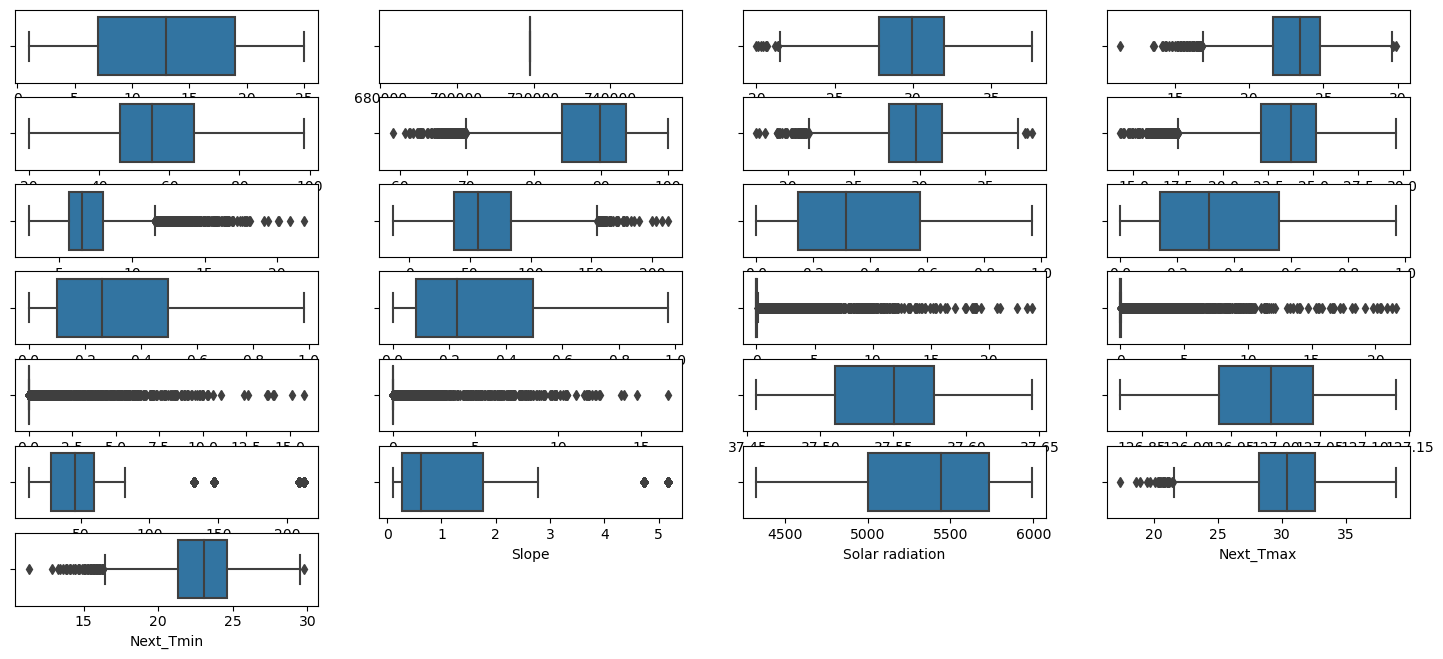

In [45]:
plt.figure(figsize=(18,10))
for o in enumerate(df):
    plt.subplot(9,4,o[0]+1)
    sns.boxplot(df[o[1]])

As we can see, just a few columns appear to have outliers after the skewness has been eliminated.

# Elimination of Outliers

# zscore

In [47]:
# Examining the new dataframe's shape.
df1.shape     

(6907, 27)

In [72]:
from scipy.stats import zscore

z=np.abs(zscore(df))

print(np.where(z>3))

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64), array([ 8, 15, 15, ...,  3,  3,  7], dtype=int64))


In [73]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (7588, 25)
After removing outliers:: (6739, 25)


# IQR (Interquartile Range)

In [74]:
from scipy import stats 
IQR = stats.iqr(df) 
IQR

37.2645068965

In [75]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(2095, 25)


# Picking ZSCORE because IQR has significant data loss

In [76]:
df=df_1

In [77]:
df.shape

(6739, 25)

# Skewness Control

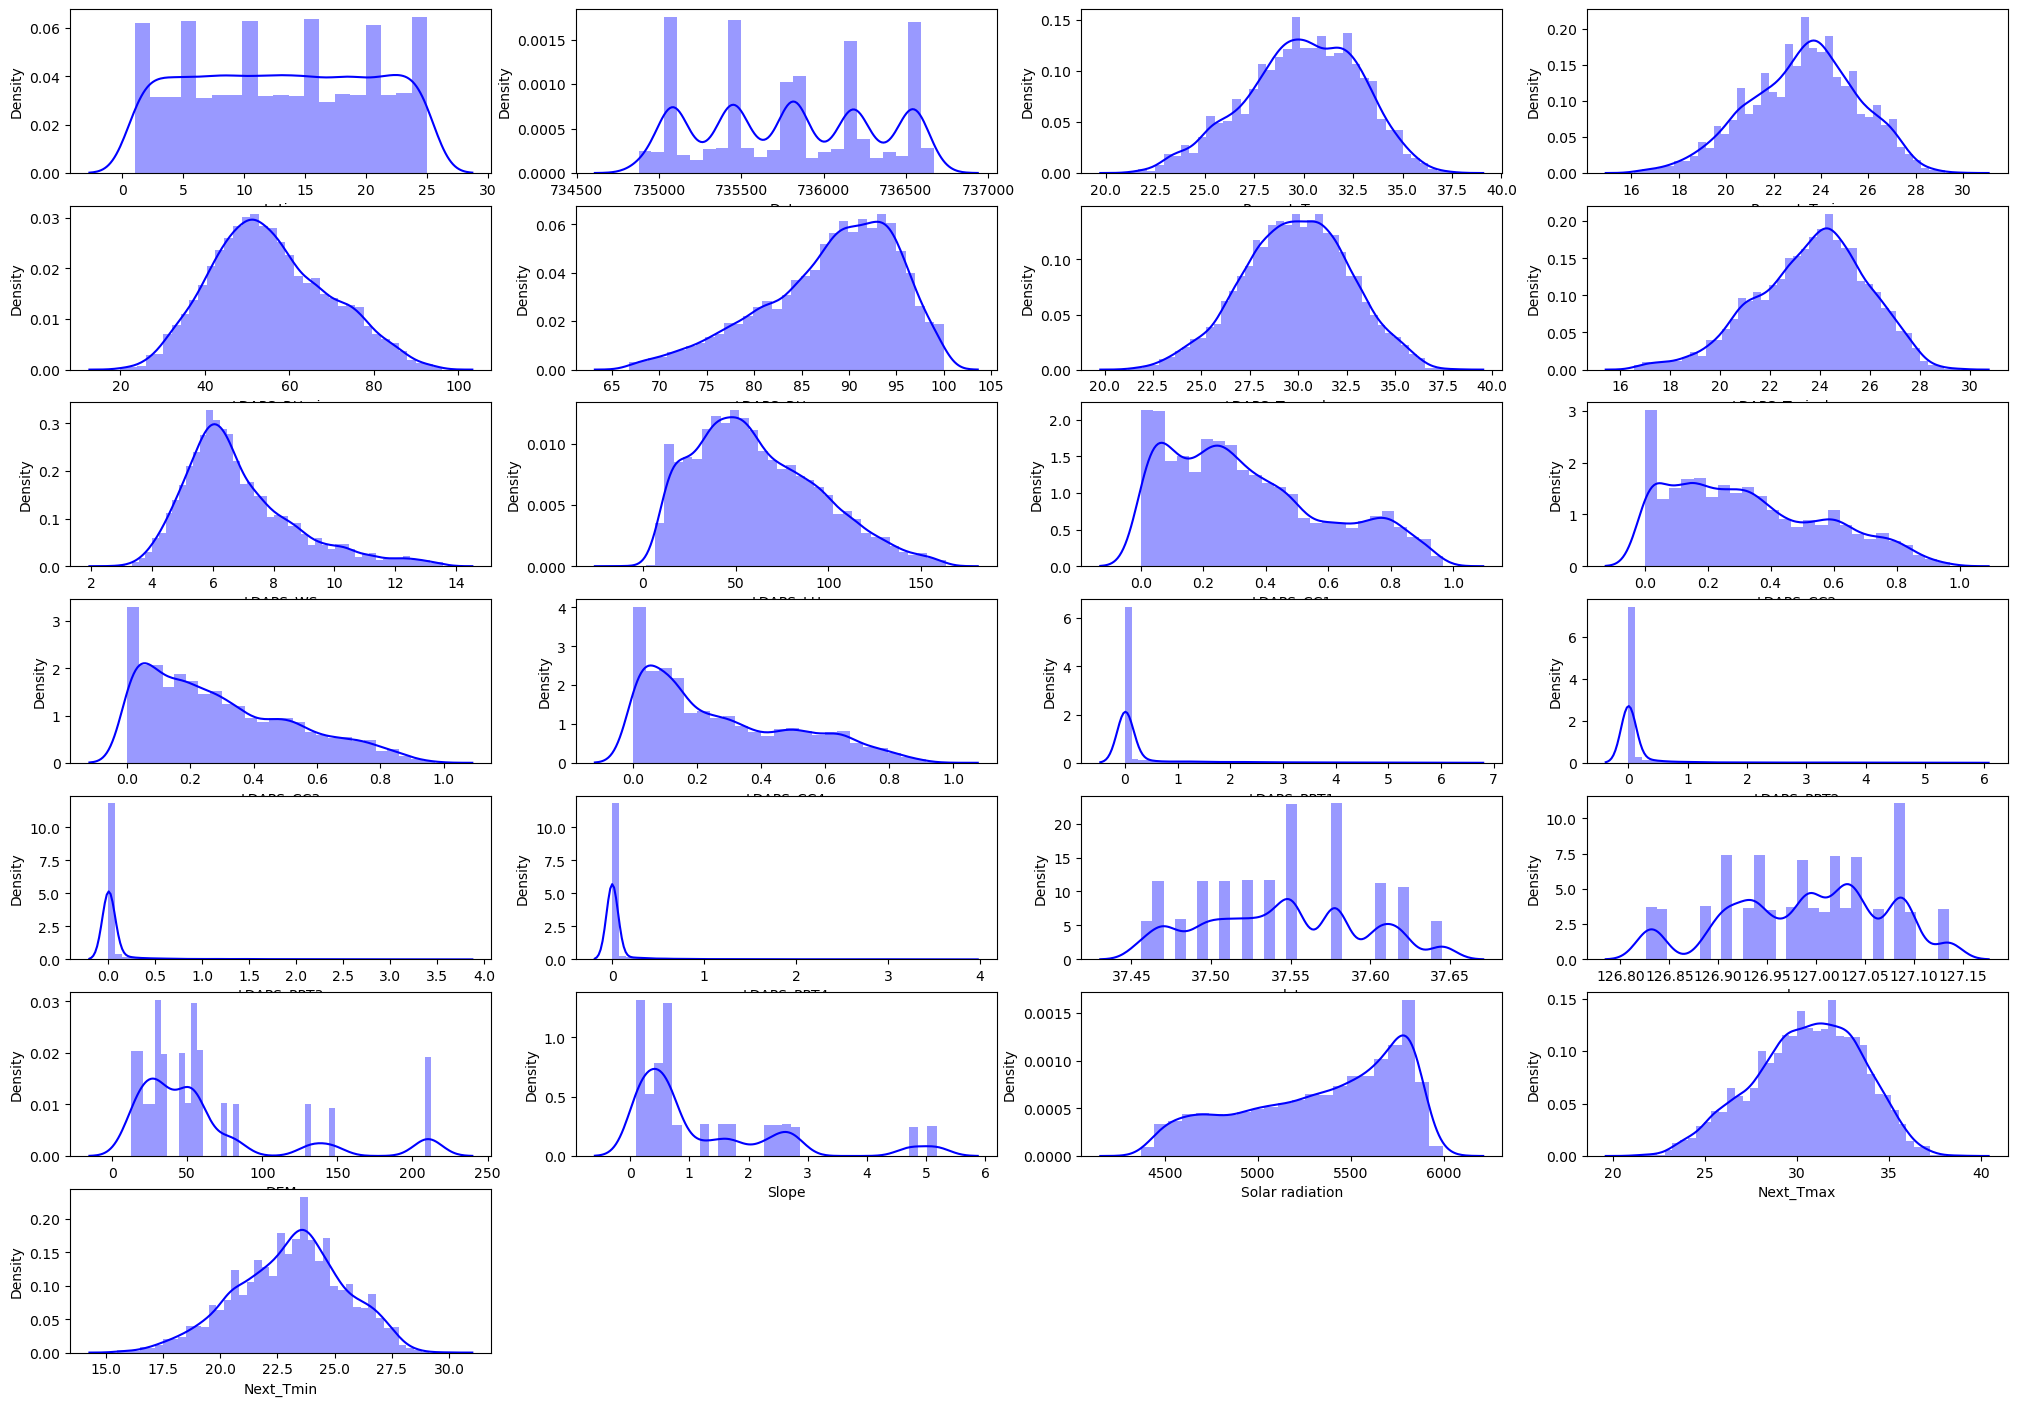

In [37]:
plt.figure(figsize=(25,20))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='b')

In [38]:
df.skew()

station            -0.001594
Date                0.022610
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
dtype: float64

higher than +/- 0.5 skewness will be treated

In [39]:
#Getting rid of skewness in the data
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in df.columns:
    if abs(df.loc[:,i].skew())>0.5:
        df.loc[:,i]=PT.fit_transform(df.loc[:,i].values.reshape(-1,1))

In [40]:
df.skew()

station            -0.001594
Date                0.022610
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.103320
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            0.007615
LDAPS_LH           -0.030736
LDAPS_CC1           0.065308
LDAPS_CC2           0.050023
LDAPS_CC3           0.094449
LDAPS_CC4           0.142061
LDAPS_PPT1          1.617538
LDAPS_PPT2          1.820237
LDAPS_PPT3          1.995359
LDAPS_PPT4          2.267954
lat                 0.106983
lon                -0.277547
DEM                 0.038830
Slope               0.233799
Solar radiation    -0.172156
Next_Tmax          -0.267526
Next_Tmin          -0.234328
dtype: float64

As can be seen, skewness has been eliminated. However, this is the best outcome we were able to achieve.

# X and Y Data Division

# dividing the two variables into distinct parts

In [35]:
y1 = df["Next_Tmax"]
y2 = df["Next_Tmin"]
x = df.drop(["Next_Tmax","Next_Tmin"], axis=1)

# X Values are Scaled

In [37]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)

In [43]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [44]:
pd.DataFrame(x).describe()

0            1            2            3            4   \
count  6739.000000  6739.000000  6739.000000  6739.000000  6739.000000   
mean      0.502281     0.511126     0.531753     0.520243     0.468041   
std       0.300301     0.287513     0.174866     0.167222     0.181413   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.250000     0.307350     0.414634     0.405797     0.337671   
50%       0.500000     0.518374     0.542683     0.528986     0.449311   
75%       0.750000     0.736080     0.664634     0.637681     0.593095   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                5            6            7            8            9   ...  \
count  6739.000000  6739.000000  6739.000000  6739.000000  6739.000000  ...   
mean      0.507566     0.513492     0.543201     0.622685     0.751265  ...   
std       0.226959     0.162358     0.170643     0.154769     0.103473  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.339183     0.401883     0.431959     0.524483     0.678446  ...   
50%       0.517302     0.515788     0.559360     0.614616     0.749282  ...   
75%       0.682132     0.628497     0.662575     0.725438     0.828262  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

                13           14           15           16           17  \
count  6739.000000  6739.000000  6739.000000  6739.000000  6739.000000   
mean      0.433375     0.185769     0.161887     0.146186     0.124836   
std       0.290349     0.353623     0.333953     0.316520     0.301235   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.179187     0.000000     0.000000     0.000000     0.000000   
50%       0.412198     0.000000     0.000000     0.000000     0.000000   
75%       0.703955     0.095642     0.035085     0.020956     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                18           19           20           21           22  
count  6739.000000  6739.000000  6739.000000  6739.000000  6739.000000  
mean      0.465084     0.533228     0.517318     0.457285     0.496401  
std       0.264998     0.257259     0.260310     0.309580     0.266237  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.286017     0.359223     0.366947     0.169437     0.263680  
50%       0.500530     0.546926     0.543026     0.398283     0.516640  
75%       0.643008     0.699029     0.636291     0.741167     0.741522  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 23 columns]

scalling of data is achieved

# Next_Tmax(The next-day Maximum Air Temperature (Â°C))

# Linear Regression

In [22]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# The Best Random State To Check For Data Splitting

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y1_train,y1_test = train_test_split(x,y1,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y1_train)
    predrf = LR.predict(x_test)
    score = r2_score(y1_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.8035417974676724  on Random_state  30


In [47]:
# 70% for train, 30% for test data split
x_train,x_test,y1_train,y1_test=train_test_split(x,y1,test_size=.30,random_state=maxRS)

In [48]:
#Importing all necessary libraries will help us identify the optimum algorithm.
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [49]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]
for m in model:
    print("*******************************************************************************")
    print("===============================================================================")
    print('accuracy score of :', m)
    m.fit(x_train,y1_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y1_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y1_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y1_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y1_test,pred)))
    score=cross_val_score(m,x,y1,cv=8)
    print(score)
    print("cross validation score:  ",score.mean())
    print("Difference between R2 score and cross validation score is :  ",r2_score(y1_test,pred)-abs(score.mean()))
    print("===============================================================================")
    print("*******************************************************************************")

*******************************************************************************
accuracy score of : LinearRegression()
R2 Score:                 0.7823758834190632
Mean Absolute Error:      1.0574369759137328
Mean Squared error:       1.8980803418878314
Root Mean Squared Error:  1.377708366051332
[0.61048465 0.73342953 0.64933075 0.68200722 0.68627828 0.69875056
 0.78672242 0.56762198]
cross validation score:   0.6768281717111908
Difference between R2 score and cross validatio score is :   0.10554771170787236
*******************************************************************************
*******************************************************************************
accuracy score of : RandomForestRegressor()
R2 Score:                 0.8996135905215144
Mean Absolute Error:      0.7081112759643918
Mean Squared error:       0.8755531023738876
Root Mean Squared Error:  0.9357099456422848
[0.63669355 0.73867734 0.60930803 0.60744091 0.68957542 0.67901045
 0.75157173 0.57432835]
cross vali

# Tuning of Hyperparameters

In [89]:
# Importing all necessary libraries
from sklearn.model_selection import GridSearchCV

In [90]:
# locating the parameters for our ideal model.

parameters= {'n_estimators' : [50,100,150,200],
              'learning_rate':np.arange(0.05,0.5,0.05),
              'gamma' : np.arange(0,0.5,0.1),
              'max_depth' : [4, 6, 8,10]}

In [91]:
gcv=GridSearchCV(xgb(),parameters,cv=5)

In [98]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=Non

In [99]:
gcv.best_params_

{'gamma': 0.1,
 'learning_rate': 0.15000000000000002,
 'max_depth': 6,
 'n_estimators': 200}

R2_score:  0.9165267040781303
RMSE value:  0.9190024815391122
MAE:  0.677977885503551
MSE:  0.8445655610750463


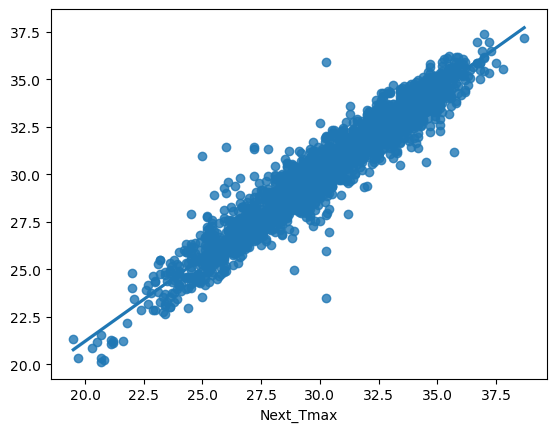

In [108]:
model1 = xgb(gamma=0.1 , learning_rate=0.15000000000000002 , max_depth=6 , n_estimators=200 )
model1.fit(x_train,y_train)
pred= model1.predict(x_test)
print('R2_score: ', r2_score(y_test,pred))
print("RMSE value: ", np.sqrt(metrics.mean_squared_error(y_test,pred)))
print("MAE: ",metrics.mean_absolute_error(y_test,pred))
print("MSE: ", metrics.mean_squared_error(y_test,pred))

# Using regplot to display the expected value.
sns.regplot(y_test,pred)
plt.show()

# For Next_Tmax with Ridge

In [50]:
#importing the random search CV 
from sklearn.model_selection import GridSearchCV
parameters = {'max_iter' :[0,10,20],
              'random_state':[15,16,17],
              'solver' : [ 'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Rd=Ridge()

clf = GridSearchCV(Ridge(), parameters, cv=5)
clf.fit(x_train, y1_train)
clf.best_params_  #ideal parameters

{'max_iter': 20, 'random_state': 15, 'solver': 'sag'}

In [51]:
clf_pred=clf.best_estimator_.predict(x_test)

In [52]:
r2_score(y1_test, clf_pred)

0.7822062114427643

For Next_Tmax, our model learned about 78.23%.

# Model Save

In [53]:
import joblib
joblib.dump(clf.best_estimator_,"Temperature_Tmax.obj")
RF_from_joblib=joblib.load('Temperature_Tmax.obj')
Predicted = RF_from_joblib.predict(x_test)
Predicted

array([27.58329752, 25.94151357, 33.10632418, ..., 27.3809777 ,
       30.89800328, 31.9069608 ])

In [54]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([RF_from_joblib.predict(x_test)[:],y1_test[:]],index=["Predicted","Original"])

0          1          2          3          4          5     \
Predicted  27.583298  25.941514  33.106324  31.101742  31.545289  28.667486   
Original   24.600000  25.900000  33.800000  32.300000  30.700000  26.300000   

                6          7          8          9          10         11    \
Predicted  32.017356  33.602379  30.785725  32.869177  30.110092  28.621991   
Original   31.000000  34.800000  31.400000  32.700000  29.700000  28.300000   

                12         13         14         15         16         17    \
Predicted  33.569939  28.010106  33.106206  32.139624  27.838468  32.729089   
Original   33.900000  29.500000  33.800000  31.200000  25.800000  31.000000   

                18        19         20        21         22         23    \
Predicted  27.476275  28.18945  30.452518  30.91886  35.898171  30.467401   
Original   26.400000  27.20000  31.200000  34.20000  35.600000  31.200000   

               24         25        26         27         28         29    \
Predicted  28.68344  27.085703  29.37114  25.887732  34.870509  29.912972   
Original   29.70000  27.100000  30.90000  23.600000  34.300000  29.500000   

                30         31         32         33         34         35    \
Predicted  25.462614  32.083824  32.885131  26.369277  30.590737  30.707038   
Original   24.700000  34.000000  32.900000  26.500000  31.700000  30.400000   

                36         37         38         39         40         41    \
Predicted  33.878521  32.437453  28.514169  30.842203  31.828045  33.893602   
Original   34.500000  32.200000  28.000000  30.600000  31.900000  33.000000   

                42         43         44        45         46         47    \
Predicted  30.347237  31.105699  27.749417  28.78842  31.300114  30.034683   
Original   29.800000  31.800000  27.100000  25.60000  29.900000  30.800000   

                48         49         50         51         52         53    \
Predicted  25.509932  31.987983  30.446836  25.511619  34.250459  31.841939   
Original   25.500000  30.700000  30.800000  25.300000  34.600000  32.700000   

                54         55       56         57         58         59    \
Predicted  24.665552  35.575654  32.7894  33.620836  32.577311  30.183394   
Original   25.900000  36.600000  32.4000  34.100000  31.700000  29.600000   

                60         61         62         63         64         65    \
Predicted  31.125444  28.463291  25.643409  28.627996  30.521767  32.682399   
Original   30.800000  28.600000  25.300000  26.800000  28.600000  31.700000   

               66        67         68         69         70         71    \
Predicted  29.98032  32.41535  33.081129  30.014443  30.653064  32.264256   
Original   30.90000  32.60000  35.400000  30.100000  30.100000  32.200000   

               72         73         74         75         76         77    \
Predicted  26.36672  29.006448  29.964318  32.845379  31.350631  30.165245   
Original   24.00000  29.300000  29.600000  32.400000  31.500000  29.500000   

                78         79         80        81         82         83    \
Predicted  25.981772  26.499205  28.972839  22.83676  23.911644  29.699316   
Original   25.600000  26.700000  26.600000  25.10000  25.400000  28.300000   

                84         85         86         87         88         89    \
Predicted  29.466392  25.717319  30.163863  27.925099  30.566211  31.086488   
Original   29.000000  25.900000  27.500000  28.800000  29.900000  30.600000   

                90         91         92         93         94        95    \
Predicted  32.356751  24.491341  26.660965  34.274736  30.564843  32.66152   
Original   32.800000  24.000000  25.500000  34.800000  33.200000  32.70000   

                96        97         98         99         100        101   \
Predicted  30.312737  31.43689  29.507813  32.871948  30.155999  29.605067   
Original   30.100000  31.00000  29.700000  32.800000  31.500000  30.000000   

         

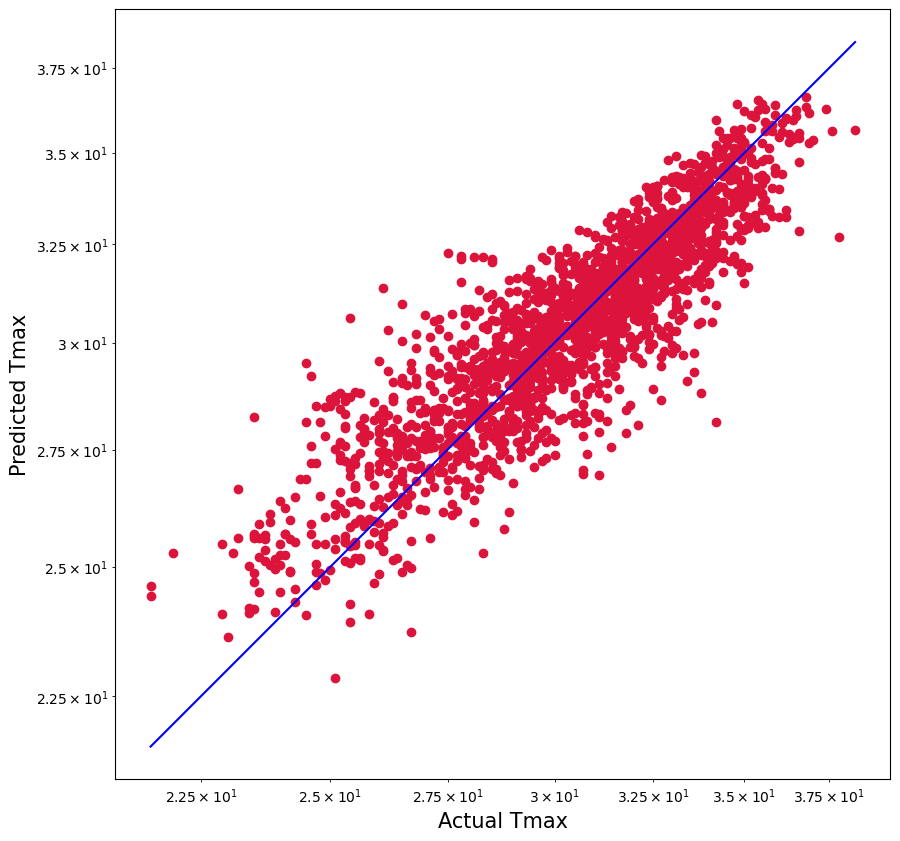

In [55]:
plt.figure(figsize=(10,10))
plt.scatter(y1_test, Predicted, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(Predicted), max(y1_test))
p2 = min(min(Predicted), min(y1_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Tmax', fontsize=15)
plt.ylabel('Predicted Tmax', fontsize=15)
plt.axis('equal')
plt.show()

# Next_Tmin(The next-day Minimum Air Temperature (Â°C))

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y2_train,y2_test = train_test_split(x,y2,test_size=.25,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y2_train)
    predrf = LR.predict(x_test)
    score = r2_score(y2_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.8399390882992911  on Random_state  152


In [57]:
# dividing the data into 75% train and 25% test
x_train,x_test,y2_train,y2_test=train_test_split(x,y2,test_size=.25,random_state=maxRS)

In [58]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]
for m in model:
    print("*******************************************************************************")
    print("===============================================================================")
    print('accuracy score of ->', m)
    m.fit(x_train,y2_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y2_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y2_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y2_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y2_test,pred)))
    score=cross_val_score(m,x,y2,cv=8)
    print(score)
    print("cross validation score:  ",score.mean())
    print("Difference between R2 score and cross validatio score is - ",r2_score(y2_test,pred)-abs(score.mean()))
    print("===============================================================================")

*******************************************************************************
accuracy score of -> LinearRegression()
R2 Score:                 0.8399390882992911
Mean Absolute Error:      0.760482788693849
Mean Squared error:       0.9141947327713034
Root Mean Squared Error:  0.9561353109112242
[0.61836676 0.80606344 0.65668161 0.78965708 0.80528942 0.8092919
 0.83715727 0.84370258]
cross validation score:   0.7707762561725279
Difference between R2 score and cross validatio score is -  0.06916283212676322
*******************************************************************************
accuracy score of -> RandomForestRegressor()
R2 Score:                 0.9108075365968002
Mean Absolute Error:      0.5506053412462909
Mean Squared error:       0.5094265637982197
Root Mean Squared Error:  0.7137412442883063
[0.56313914 0.81803975 0.68404874 0.80009314 0.79911159 0.8311653
 0.84707945 0.85985364]
cross validation score:   0.7753163452285926
Difference between R2 score and cross validati

# Tuning of Hyperparameters

# Using Next_Tmin Linear Regression

In [59]:
#importing  random search CV
from sklearn.model_selection import GridSearchCV
parameters = {'fit_intercept' :[True],
             'n_jobs':[-1]}
LR=LinearRegression()

clf = GridSearchCV(LinearRegression(), parameters, cv=5)
clf.fit(x_train, y2_train)
clf.best_params_  #ideal parameters

{'fit_intercept': True, 'n_jobs': -1}

In [60]:
clf_pred=clf.best_estimator_.predict(x_test)

In [61]:
r2_score(y2_test, clf_pred)

0.8399390882992911

For Next_Tmin, our model learned by about 83.40%.

# Model Saving

In [62]:
import joblib
joblib.dump(clf.best_estimator_,"Temperature_Tmin.obj")
RF_from_joblib=joblib.load('Temperature_Tmin.obj')
Predicted = RF_from_joblib.predict(x_test)
Predicted

array([24.31451716, 23.42255792, 22.4590196 , ..., 26.41928131,
       25.47636032, 24.58837506])

In [63]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([RF_from_joblib.predict(x_test)[:],y2_test[:]],index=["Predicted","Original"])

0          1         2          3          4          5     \
Predicted  24.314517  23.422558  22.45902  23.873636  21.933603  23.355101   
Original   24.400000  21.300000  22.10000  23.200000  21.000000  24.200000   

                6          7          8          9          10         11    \
Predicted  19.558401  23.079801  21.298035  17.500476  22.634591  21.704775   
Original   20.000000  22.700000  20.200000  17.700000  22.700000  22.700000   

               12         13         14         15         16         17    \
Predicted  19.86035  20.442772  25.403937  22.651559  19.021207  16.167971   
Original   18.80000  20.000000  25.000000  22.400000  19.600000  16.700000   

                18         19         20        21         22         23    \
Predicted  20.760291  22.647938  19.301666  17.56898  23.396467  25.220858   
Original   20.700000  24.100000  18.500000  17.70000  24.100000  26.400000   

              24        25         26         27         28         29    \
Predicted  24.5348  18.15735  21.610826  22.104002  21.098151  21.927867   
Original   26.5000  18.10000  21.600000  21.500000  21.100000  22.100000   

                30         31         32         33         34         35    \
Predicted  26.073188  22.694537  24.005266  22.029728  22.951222  21.537887   
Original   24.100000  24.100000  24.800000  20.600000  23.900000  23.400000   

                36         37         38         39        40         41    \
Predicted  23.826434  21.885632  28.202287  21.440665  26.04705  23.766781   
Original   22.800000  22.600000  28.000000  21.800000  26.30000  23.100000   

                42         43         44         45         46         47    \
Predicted  19.395815  20.760676  20.431789  23.169379  24.647949  25.246198   
Original   20.800000  20.700000  22.400000  25.000000  25.600000  26.800000   

               48         49         50         51         52         53    \
Predicted  26.25627  23.713996  23.811761  27.219573  24.212745  26.106802   
Original   26.20000  24.900000  22.100000  25.900000  23.600000  26.600000   

                54         55         56         57         58         59    \
Predicted  23.979651  21.081086  26.151998  26.230616  22.627767  21.257556   
Original   24.600000  22.800000  25.600000  26.700000  22.300000  21.000000   

                60        61       62         63         64         65    \
Predicted  22.296763  23.04142  21.9489  23.205632  23.753424  26.361896   
Original   23.700000  23.80000  20.9000  24.000000  22.800000  26.800000   

                66         67         68        69         70         71    \
Predicted  20.529736  21.663466  22.284451  24.27736  23.077485  24.511478   
Original   20.100000  23.000000  23.100000  23.40000  23.400000  25.600000   

                72         73         74         75         76         77    \
Predicted  24.598813  23.320035  24.977989  21.945536  23.475321  21.936439   
Original   24.500000  23.200000  25.000000  22.700000  23.600000  21.800000   

               78         79         80        81         82         83    \
Predicted  24.23308  26.016383  23.303507  24.82825  24.066823  21.334946   
Original   24.50000  26.700000  24.000000  25.20000  24.600000  22.900000   

                84         85         86         87         88        89    \
Predicted  21.837082  22.195786  22.364392  26.860918  25.035978  21.70115   
Original   21.100000  23.100000  23.500000  27.600000  24.200000  22.40000   

               90         91         92         93         94         95    \
Predicted  26.67572  25.358536  26.114773  20.443036  23.214125  24.029889   
Original   26.40000  26.200000  25.700000  20.800000  23.900000  24.800000   

                96         97         98         99         100        101   \
Predicted  23.084791  22.627999  25.760432  21.521372  26.552263  18.123809   
Original   22.300000  24.700000  27.000000  18.700000  26.700000  18.000000   

                10

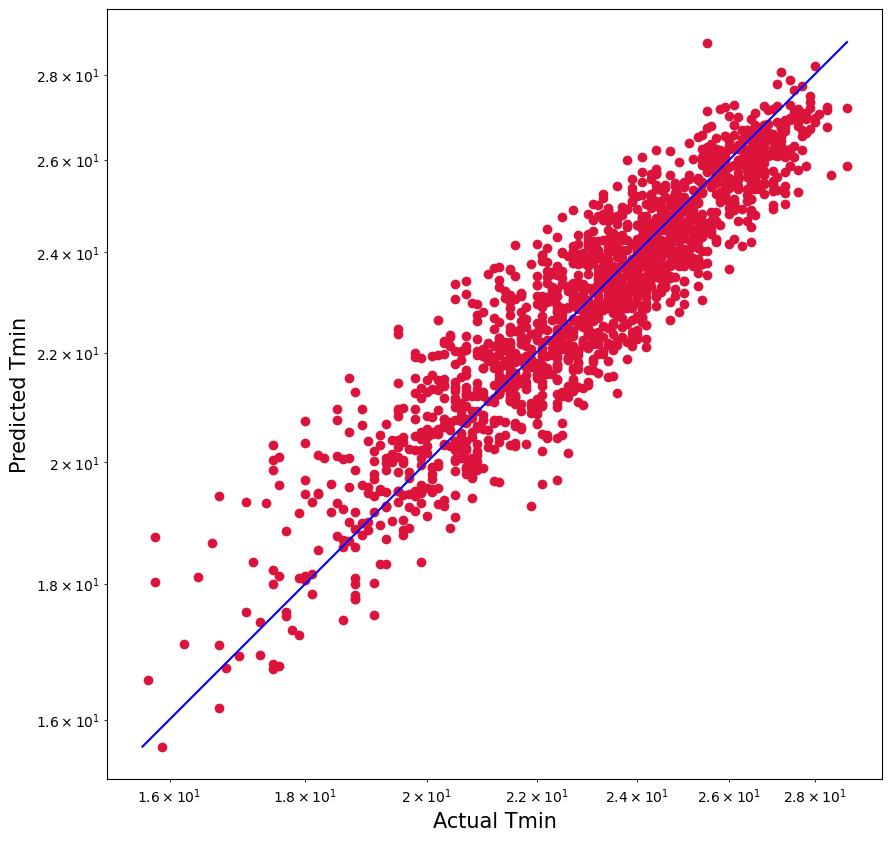

In [64]:
plt.figure(figsize=(10,10))
plt.scatter(y2_test, Predicted, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(Predicted), max(y2_test))
p2 = min(min(Predicted), min(y2_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Tmin', fontsize=15)
plt.ylabel('Predicted Tmin', fontsize=15)
plt.axis('equal')
plt.show()